# The second part of the assignment, IDS 2021-2022
In this Jupyter notebook document all your results and the way you have obtained them. Please use the _Python environment_ provided for this part of the assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing  other outputs you have generated that are not included in this notebook (such as pdf, jpg, and others). Please make sure that the other outputs are easily identifiable, i.e. use names as requested in the corresponding question. _You do not need to include the datasets._

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> Please make sure to include the names and matriculation numbers of all group members in the slot provided below. </font> If a name or a student id is missing, the student will not receive any points.

<font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Abdul Qadir Khan  414354
    
    2. Javed Amin  404073
    
    3. Our 3rd member told us 3 days before submission that he is dropping the course!

# Setup

In [1]:
### Display
from IPython.core.display import display, HTML

### Widgets
#import ipywidgets as widgets

### Data Handline
import pandas as pd
import numpy as np

### Utility
import math
import string
import datetime
import pickle

### Plotting
# Matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
# Matplotlib toolkits
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Seaborn
import seaborn as sns
# Plotly
import plotly.graph_objects as go
# Gespatial data with cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


### Frequent Pattern Mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules as arule

### Text Mining
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

### PM4Py
import pm4py
# Log Handling
from pm4py.objects.conversion.log import converter as log_converter
# Statistics
from pm4py.statistics.traces.generic.log import case_statistics
# Filtering
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.algo.filtering.log.attributes import attributes_filter
# Discovery and Conformance Checking
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.objects.conversion.process_tree import converter as pt_converter
# Visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer

Matplotlib is building the font cache; this may take a moment.
C:\Users\Abdul Qadir Khan\anaconda3\envs\IDS20212\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
C:\Users\Abdul Qadir Khan\anaconda3\envs\IDS20212\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# Pandas indexing
idx = pd.IndexSlice

Be careful if you use the **matplotlib widget** magic. If you do not close the created plots, previous plots may change if you create a new one.
So if you use this magic command, be careful about your outputs in your final submission.

In [42]:
%matplotlib inline

# Q1 - Preprocessing (20 points)
In this question, we consider a US-census dataset (**census_data.csv**).
Each row contains statistics of a certain tract on a variety of, particularly income- and work-related, life aspects of US citizens.
Short column description:

| Column | Description |
| ------ | ----------- |
| CensusTract | Tract |
| State | State |
| County | County |
| TotalPop | Total population  |
| Men | Number of men |
| Women | Number of women |
| Hispanic, White, Black, Native, Asian, Pacific | Percentage of ethnic group |
| Citizen | Percentage of citizen |
| Income | Median household income |
| IncomePerCap | Income per capita |
| Poverty | Poverty rate |
| ChildPoverty | Child poverty rate |
| Professional | Employed in management, business, science, and arts (percentage) |
| Service, Office, Construction, Production | Other profession fields (percentage) |
| PrivateWork, PublicWork | Employed in private / public sector (percentage) |
| Drive, Carpool, Transit, Walk, OtherTransp | Means of commuting (percentage) |
| WorkAtHome | Working at home (percentage) |
| MeanCommute | Mean time for commuting |
| Employed | Number of employed |
| SelfEmployed | Self-employed (percentage) |
| FamilyWork | Unpaid family work (percentage) |
| Unemployment | Unemployment rate |


## Loading the Data and Initial Quality Investigation

**a)** Load the dataset into a dataframe `df`. <font color='red'>Use the CensusTract as index for your dataframe</font>. In doing so, ensure that the index is valid, that is, it does not contain any duplicate entries.

**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [43]:
# your code
import pandas as pd
df = pd.read_csv('dataset/census_data.csv')
df = df.set_index('CensusTract')
df.shape

(74001, 34)

**b)** Show the data types of the dataframe columns as well as the first few rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)? 

In [44]:
# your code
print(df.dtypes)
df.head()

State            object
County           object
TotalPop          int64
Men             float64
Women           float64
Hispanic        float64
White           float64
Black           float64
Native          float64
Asian           float64
Pacific         float64
Citizen           int64
Income          float64
IncomePerCap    float64
Poverty         float64
ChildPoverty    float64
Professional    float64
Service         float64
Office          float64
Construction    float64
Production      float64
Drive           float64
Carpool         float64
Transit         float64
Walk            float64
OtherTransp     float64
WorkAtHome      float64
MeanCommute     float64
Employed          int64
PrivateWork     float64
PublicWork      float64
SelfEmployed    float64
FamilyWork      float64
Unemployment    float64
dtype: object


,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
1001020100,Alabama,Autauga,1948,940.0,1008.0,0.9,87.4,7.7,0.3,0.6,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1001020200,Alabama,Autauga,2156,1059.0,1097.0,0.8,40.4,53.3,0.0,2.3,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
1001020300,Alabama,Autauga,2968,1364.0,1604.0,0.0,74.5,18.6,0.5,1.4,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
1001020400,Alabama,Autauga,4423,2172.0,2251.0,10.5,82.8,3.7,1.6,0.0,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
1001020500,Alabama,Autauga,10763,4922.0,5841.0,0.7,68.5,24.8,0.0,3.8,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


*So far, the datatypes seem to be reasonabl. We did not find any numerical columns having a non-numerical data type.*

**c)** To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable. 
Are there any categorical column candidates? Explain your answer. \
Afterwards, convert these columns into categorical columns.

In [45]:
# your code
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols
list(set(cols) - set(num_cols))

['County', 'State']

*We did not find any categorical candidates column. We have just 2 columns State and country as a categorical columns.*

**d)** To select a good strategy to deal with missing data, it is important to get an overview over the general data distribution.
Show the basic statistics for the dataset and create 6 boxplots for the following column groupings:

    ['TotalPop', 'Men', 'Women', 'Citizen', 'Employed'],
    ['Income', 'IncomePerCap'],
    ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
    ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Poverty', 'ChildPoverty'],
    ['Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome'],
    ['MeanCommute']

Can you spot any (severe) data quality problems, in particular, are there unrealistic values (also considering the semantics)?

*Hint: Use the `df.describe()` function.*

In [46]:
# your code (description)
display(df.describe())
df.shape

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,74001.000000,73622.000000,73640.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,74001.000000,...,73204.000000,73204.000000,73204.000000,73052.000000,74001.000000,73194.000000,73194.000000,73194.000000,73194.000000,73199.000000
mean,4325.591465,2127.937437,2197.755337,16.862810,62.032106,13.272581,0.727726,4.588253,0.145012,3043.079566,...,3.123340,1.891606,4.368093,25.667357,1983.907366,78.975238,14.621566,6.233814,0.169772,9.028663
std,2129.306903,1072.200320,1095.899964,22.940695,30.684152,21.762483,4.488340,8.794003,1.037354,1475.492946,...,5.881237,2.596198,3.904990,6.964881,1073.429808,8.345758,7.535786,4.042990,0.458227,5.955441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2891.000000,1409.000000,1460.000000,2.400000,39.400000,0.700000,0.000000,0.200000,0.000000,2037.000000,...,0.400000,0.400000,1.800000,20.800000,1249.000000,74.600000,9.600000,3.500000,0.000000,5.100000
50%,4063.000000,1987.000000,2066.000000,7.000000,71.400000,3.700000,0.000000,1.400000,0.000000,2863.000000,...,1.400000,1.100000,3.500000,25.000000,1846.000000,80.100000,13.400000,5.500000,0.000000,7.700000
75%,5442.000000,2674.000000,2774.000000,20.400000,88.300000,14.400000,0.400000,4.800000,0.000000,3838.000000,...,3.500000,2.500000,5.900000,29.800000,2553.000000,84.600000,18.200000,8.100000,0.000000,11.400000
max,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,91.300000,84.700000,37416.000000,...,100.000000,100.000000,100.000000,80.000000,24075.000000,100.000000,100.000000,100.000000,26.500000,100.000000


(74001, 34)

<AxesSubplot:>

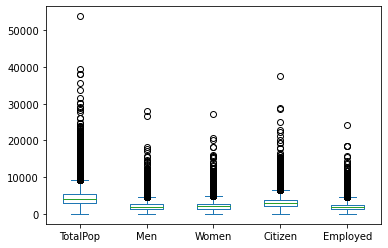

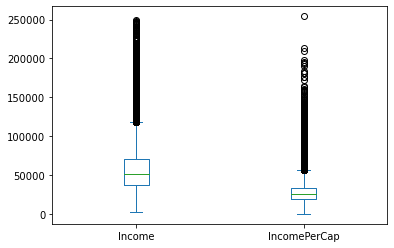

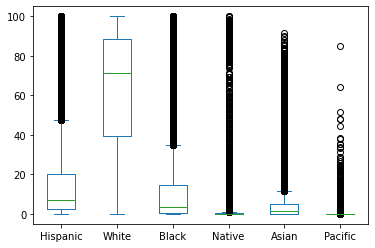

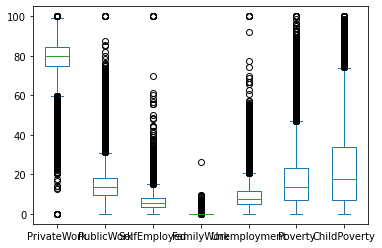

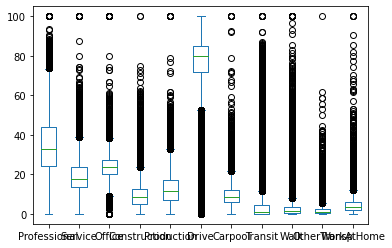

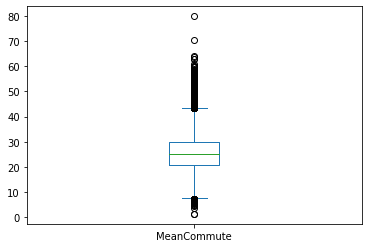

In [47]:
# your code (boxplots)
df[['TotalPop', 'Men', 'Women', 'Citizen', 'Employed']].plot.box()

df[['Income', 'IncomePerCap']].plot.box()
df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].plot.box()
df[['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Poverty', 'ChildPoverty']].plot.box()
df[['Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome']].plot.box()
df[['MeanCommute']].plot.box()

*This summary can already help us to identify missing values or the presence of potentially incorrectly recorded data, e.g., unrealistic min/max values. From the summary, we can see that several attributes have a minimum value of 0. From this, combined with domain knowledge, we can conclude that for several attributes the '0' value represents a missing/incorrect value. also seen a lot of out laier in our data*

## Handling Missing Values
(In the following task you can assume that every NAN entry in the dataframe is actually a missing value. This can paritally be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., numbers types as string would result in an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.)

**e)** Simply filling missing entries is usually not a good idea. Therefore, you should first analyze the quantity of missing values and check for patterns of missing values.

To this end, compute the following statistics on missing values:
1) How many entries does the dataframe have? (To relate this to the number of entries missing)
2) How many missing values do we have?
3) How many rows have at least a single missing value?
4) Count the number of missing values per column.
5) Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.

What do you observe?

In [48]:
# your code
print('Total values in data set');
print(df.shape)
print('Total missing values in data set');
print(df.isna().sum().sum())

Total values in data set
(74001, 34)
Total missing values in data set
22469


In [49]:
# code 3 here 
# rows with have a single missing value 
df.isnull().any(axis = 1).sum()

2008

Missing values in column


State              0
County             0
TotalPop           0
Men              379
Women            361
Hispanic         690
White            690
Black            690
Native           690
Asian            690
Pacific          690
Citizen            0
Income          1100
IncomePerCap     740
Poverty          835
ChildPoverty    1118
Professional     807
Service          807
Office           807
Construction     807
Production       807
Drive            797
Carpool          797
Transit          797
Walk             797
OtherTransp      797
WorkAtHome       797
MeanCommute      949
Employed           0
PrivateWork      807
PublicWork       807
SelfEmployed     807
FamilyWork       807
Unemployment     802
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74001 entries, 1001020100 to 72153750602
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         74001 non-null  object 
 1   County        74001 non-null  object 
 2   TotalPop      74001 non-null  int64  
 3   Men           73622 non-null  float64
 4   Women         73640 non-null  float64
 5   Hispanic      73311 non-null  float64
 6   White         73311 non-null  float64
 7   Black         73311 non-null  float64
 8   Native        73311 non-null  float64
 9   Asian         73311 non-null  float64
 10  Pacific       73311 non-null  float64
 11  Citizen       74001 non-null  int64  
 12  Income        72901 non-null  float64
 13  IncomePerCap  73261 non-null  float64
 14  Poverty       73166 non-null  float64
 15  ChildPoverty  72883 non-null  float64
 16  Professional  73194 non-null  float64
 17  Service       73194 non-null  float64
 18  Office     

<AxesSubplot:xlabel='index'>

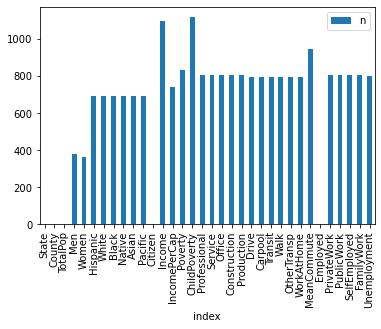

In [50]:
# code 4 here 
print('Missing values in column')
display(df.isna().sum() )
print(df.info())
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=90)

In [51]:
# code 6  
df.isna().sum(axis=1)

CensusTract
1001020100     0
1001020200     0
1001020300     0
1001020400     0
1001020500     0
              ..
72153750501    0
72153750502    0
72153750503    0
72153750601    0
72153750602    0
Length: 74001, dtype: int64

*As i am observe data set have a lot of missing values just like we have Total values in data set is this (74001, 34) and we have Total missing values in data set is 22469 almost 30% values are missing in our data set so we are fill these values randomly .*

**f)** We decide to **remove all rows from `df` where the total population is zero**. \
Given the preceding results, how do you evaluate this strategy? Try to motivate your argumentation by additional short analysis results (see hint for an inspiration).

*Hint: It might be interesting to have a look at the rows with zero population. Afterwards, you can provide some analysis results that show that your (potential) observation generalizes to all rows with zero population.*

In [52]:
# your code
df = df[df.TotalPop != 0]
# df = df[df.TotalPop = 0]
print(df.shape)
print(df['TotalPop'] == 0)

(73311, 34)
CensusTract
1001020100     False
1001020200     False
1001020300     False
1001020400     False
1001020500     False
               ...  
72153750501    False
72153750502    False
72153750503    False
72153750601    False
72153750602    False
Name: TotalPop, Length: 73311, dtype: bool


*According to our results we observe that we have 690 missing values in our data set so almost less then 1 percent so we are easily ignore these values and removes these rows with total population is 0.*

## Imputing Missing Values

**g)** The previous analysis showed that there are missing values in the 'Men' and 'Women' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Do not forget about the semantics of the columns.*

In [53]:
# your code
df['Men'] = df['Men'].fillna(df['Men'].mean())
df['Women'] = df['Women'].fillna(df['Women'].mean())
df.isna().sum()

State             0
County            0
TotalPop          0
Men               0
Women             0
Hispanic          0
White             0
Black             0
Native            0
Asian             0
Pacific           0
Citizen           0
Income          410
IncomePerCap     50
Poverty         145
ChildPoverty    428
Professional    117
Service         117
Office          117
Construction    117
Production      117
Drive           107
Carpool         107
Transit         107
Walk            107
OtherTransp     107
WorkAtHome      107
MeanCommute     259
Employed          0
PrivateWork     117
PublicWork      117
SelfEmployed    117
FamilyWork      117
Unemployment    112
dtype: int64

In [54]:
assert df[['Men', 'Women']].isna().sum().sum() == 0

**h)** Finally, impute the remaining missing values in `df` using the knn-imputation method.

1) Before you impute the remaining missing values, you should improve the data semantics consistency by turning the columns 
    
        ['Men', 'Women', 'Citizen', 'Employed']
    
    into percentage scores as well. To this end, divide these values by the total population (i.e., 'TotalPop')

In [55]:
# your code
# Calculate Percentage
df["percentage scores"] = df["Men"] + df["Women"] +df["Citizen"] + df["Employed"] / df["TotalPop"]
df["percentage scores"]=df["percentage scores"].round(2)
df.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,percentage scores
CensusTract,,,,,,,,,,,,,,,,,,,,,
1001020100,Alabama,Autauga,1948,940.0,1008.0,0.9,87.4,7.7,0.3,0.6,...,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4,3451.48
1001020200,Alabama,Autauga,2156,1059.0,1097.0,0.8,40.4,53.3,0.0,2.3,...,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3,3818.35
1001020300,Alabama,Autauga,2968,1364.0,1604.0,0.0,74.5,18.6,0.5,1.4,...,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2,5303.46
1001020400,Alabama,Autauga,4423,2172.0,2251.0,10.5,82.8,3.7,1.6,0.0,...,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8,7729.40
1001020500,Alabama,Autauga,10763,4922.0,5841.0,0.7,68.5,24.8,0.0,3.8,...,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2,18429.47


2) Impute the missing values using the knn-imputation method.
    To this end, apply the following steps:
        1) Create a working copy `df_tmp` of your dataframe.
        2) Drop the columns `['State', 'County']` from `df_tmp`. On the one hand, this makes the following steps easier because we only have to deal with numerical columns; on the other hand, an alternative one-hot encoding is also problematic as this will cause our feature dimensionality to explode!
        3) Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, even though we are mostly using percentages, knn can become very biased.
        4) Impute the missing values considering five neighbors.
        5) Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
        6) Append the columns `['State', 'County']`
 
In the end, `df` should not contain missing values and have columns `['State', 'County']`.

*Hint: Be careful with the indices of your dataframes.*


In [56]:
# your code 1) 2)
df_tmp = df.copy()
df.reset_index(inplace=True)
df_tmp=df.drop(['CensusTract','State', 'County'], axis = 1)
df_tmp.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,percentage scores
0,1948,940.0,1008.0,0.9,87.4,7.7,0.3,0.6,0.0,1503,...,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4,3451.48
1,2156,1059.0,1097.0,0.8,40.4,53.3,0.0,2.3,0.0,1662,...,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3,3818.35
2,2968,1364.0,1604.0,0.0,74.5,18.6,0.5,1.4,0.3,2335,...,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2,5303.46
3,4423,2172.0,2251.0,10.5,82.8,3.7,1.6,0.0,0.0,3306,...,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8,7729.40
4,10763,4922.0,5841.0,0.7,68.5,24.8,0.0,3.8,0.0,7666,...,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2,18429.47


In [57]:
# # your code 3)
from sklearn.preprocessing import MinMaxScaler
df_tmp
scaler = MinMaxScaler(feature_range=(0, 5))
dataset = scaler.fit_transform(df_tmp)
dataset

array([[0.18073185, 0.16808526, 0.18495413, ..., 0.        , 0.27      ,
        0.20895242],
       [0.20005947, 0.18936414, 0.2012844 , ..., 0.        , 0.665     ,
        0.23119493],
       [0.27551153, 0.24390244, 0.29431193, ..., 0.        , 0.31      ,
        0.32123385],
       ...,
       [0.21130294, 0.19615907, 0.21651376, ..., 0.        , 1.165     ,
        0.24331503],
       [0.4891375 , 0.47618196, 0.47779817, ..., 0.        , 1.335     ,
        0.55779131],
       [0.25441841, 0.21117946, 0.28623853, ..., 0.        , 1.005     ,
        0.31412342]])

In [58]:
# # your code 4)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(dataset)
df_t = imputer.transform(dataset)
df_t
df_t=pd.DataFrame(df_t, columns=df_tmp.columns)
# print('Missing values')
print(df_t.isnull().sum().sum())
df_t.head()

0


,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,percentage scores
0,0.180732,0.168085,0.184954,0.045,4.370,0.385,0.015,0.032859,0.00000,0.200850,...,0.115,0.105,1.510152,0.195846,3.855,0.915,0.230,0.0,0.270,0.208952
1,0.200059,0.189364,0.201284,0.040,2.020,2.665,0.000,0.125958,0.00000,0.222097,...,0.035,0.000,1.408629,0.156386,3.850,0.845,0.305,0.0,0.665,0.231195
2,0.275512,0.243902,0.294312,0.000,3.725,0.930,0.025,0.076670,0.01771,0.312032,...,0.000,0.125,1.167513,0.285151,3.205,1.180,0.615,0.0,0.310,0.321234
3,0.410712,0.388384,0.413028,0.525,4.140,0.185,0.080,0.000000,0.00000,0.441790,...,0.130,0.080,1.529188,0.370093,3.785,1.060,0.155,0.0,0.540,0.468313
4,0.999833,0.880123,1.071743,0.035,3.425,1.240,0.000,0.208105,0.00000,1.024428,...,0.030,0.045,1.497462,1.046106,3.355,1.380,0.265,0.0,0.210,1.117035


In [59]:
# # your code 5)
inversedata=scaler.inverse_transform(df_t)
df_t=pd.DataFrame(inversedata, columns=df_t.columns)
print('Missing values')
print(df_t.isnull().sum().sum())
df_t.head()
filtered_rules = df_t.loc[(df_t['Hispanic'] > 101)]
filtered_rules

Missing values
0


,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,percentage scores


In [60]:
# your code 6)
data = df.copy()
df_t_reset = df_t.copy()
df_t_reset.reset_index(drop=True, inplace=True)
df_sc = data[['CensusTract','State', 'County']]
df_sc_reset  = df_sc.copy()
df_sc_reset.reset_index(drop=True, inplace=True)
df_z = pd.concat([df_sc_reset,df_t_reset], axis=1)
df = df_z.copy()
print(df.isnull().sum().sum())
df

0


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,percentage scores
0,1001020100,Alabama,Autauga,1948.0,940.0,1008.0,0.9,87.4,7.7,0.3,...,2.3,2.1,25.0,943.0,77.1,18.3,4.6,0.0,5.4,3451.48
1,1001020200,Alabama,Autauga,2156.0,1059.0,1097.0,0.8,40.4,53.3,0.0,...,0.7,0.0,23.4,753.0,77.0,16.9,6.1,0.0,13.3,3818.35
2,1001020300,Alabama,Autauga,2968.0,1364.0,1604.0,0.0,74.5,18.6,0.5,...,0.0,2.5,19.6,1373.0,64.1,23.6,12.3,0.0,6.2,5303.46
3,1001020400,Alabama,Autauga,4423.0,2172.0,2251.0,10.5,82.8,3.7,1.6,...,2.6,1.6,25.3,1782.0,75.7,21.2,3.1,0.0,10.8,7729.40
4,1001020500,Alabama,Autauga,10763.0,4922.0,5841.0,0.7,68.5,24.8,0.0,...,0.6,0.9,24.8,5037.0,67.1,27.6,5.3,0.0,4.2,18429.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73306,72153750501,Puerto Rico,Yauco,6205.0,3291.0,2914.0,99.7,0.3,0.0,0.0,...,3.3,2.3,22.5,1659.0,64.7,31.3,3.9,0.0,21.3,10559.27
73307,72153750502,Puerto Rico,Yauco,2122.0,921.0,1201.0,99.2,0.3,0.0,0.0,...,0.0,0.0,23.5,484.0,64.0,32.6,3.3,0.0,22.4,3588.23
73308,72153750503,Puerto Rico,Yauco,2277.0,1097.0,1180.0,99.5,0.4,0.0,0.0,...,0.0,3.0,29.8,582.0,58.2,32.3,9.5,0.0,23.3,4018.26
73309,72153750601,Puerto Rico,Yauco,5267.0,2663.0,2604.0,98.8,1.2,0.0,0.0,...,0.0,0.0,26.9,1369.0,67.5,31.2,1.3,0.0,26.7,9205.26


In [ ]:
assert 'State' in df.columns
assert 'County' in df.columns
assert df.isna().sum().sum() == 0
assert df['Hispanic'].min() > -0.01
assert df['Hispanic'].max() < 101

## Data Integration

**i)** In the final preprocessing step, you should integrate one additional source of data into the preprocessed dataframe `df`. 
As the data has a natural geospatial dimension, you are going to endow each tract with its geographic coordinate.
To this end, load **coordinates.csv**. Integrate the two data sources exploiting the correspondence between 'CensusTract' and 'GEOID'.
Finally, drop the 'USPS' column.

In [62]:
df2 = pd.read_csv("dataset/coordinates.csv")
df2

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001020100,9809938,36312,3.788,0.014,32.481959,-86.491338
1,AL,1001020200,3341886,5968,1.290,0.002,32.475758,-86.472468
2,AL,1001020300,5349273,9054,2.065,0.003,32.474024,-86.459703
3,AL,1001020400,6382707,16244,2.464,0.006,32.471030,-86.444835
4,AL,1001020500,11399989,46159,4.402,0.018,32.458922,-86.421826
...,...,...,...,...,...,...,...,...
73996,PR,72153750501,1795741,0,0.693,0.000,18.031240,-66.867250
73997,PR,72153750502,689929,0,0.266,0.000,18.024746,-66.860442
73998,PR,72153750503,3322868,1952,1.283,0.001,18.023325,-66.874841
73999,PR,72153750601,10987037,4527,4.242,0.002,18.017809,-66.839070


In [63]:
df_rename = df2.rename(columns={"GEOID": "CensusTract"})
df_merged = pd.merge(df,df_rename, on="CensusTract")
df_merged = df_merged.drop(["USPS"], axis=1)
df = df_merged.copy()

In [64]:
assert 'Men' in df.columns
assert 'County' in df.columns
assert 'INTPTLONG' in df.columns
assert 'INTPTLAT' in df.columns

# Q2 - Visualization (15 points)
In this task, you will analyze the data that you preprocessed in question 1 (**census_data.csv**). In particular you will analyze income-related aspects, using different means of visualization.

Start with the following preprocessed and integrated dataframe `df`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified!

**Library usage:** This notebook imports a couple visualization libraries that have a significat overlap in terms of functionalities. Therefore, you are free to use any of these libraries (and those in the environment in general) to implement the following questions as long as your resulting plot compilies with the explicitly mentioned requirements.

In [ ]:
#df = pd.read_pickle('./dataset/df_vis.pkl')

**a)** Visualize two histograms for 'Income' and 'IncomePerCap' in a **single plot**. Compare the two distributions; what do you observe?

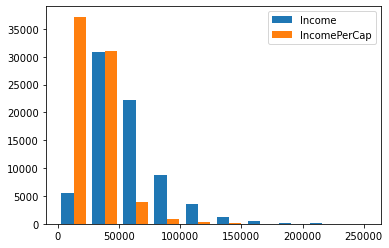

In [65]:
# your code
plt.hist(df[['Income','IncomePerCap']])
plt.legend(df[['Income','IncomePerCap']])

*As show in plot we have 2 entries income and incomepercap in first bar we notice that very low income but incomepercap in very high but in second its almost same gradualy incomepercap decrease but income graph are increased.*

## Aggregation for Visualization Pruposes
**b)** As the data contains too many rows for per-row visualizations, you should aggregate the data further before creating more interesting visualizations.
The following function will do the job for your; however, why didn't we simply run `groupby(...).mean()` to get the results for the columns
specified in `l_col`?

In [66]:
def my_aggregation(df):
    l_col = ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income', 'IncomePerCap', 
             'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 
             'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 
             'FamilyWork', 'Unemployment', 'INTPTLAT', 'INTPTLONG']
    df_tmp = df.copy()
    df_tmp.loc[idx[:, l_col]] = df_tmp.loc[idx[:, l_col]].mul(df_tmp['TotalPop'], axis=0)
    df_tmp = df_tmp.groupby(['State', 'County'], observed=True).sum()
    df_tmp.loc[idx[:, l_col]] = df_tmp.loc[idx[:, l_col]].div(df_tmp['TotalPop'], axis=0)
    
    return df_tmp


In [67]:
df = my_aggregation(df)

*Because our data set contains some categorical feature that are not supported by groupby().mean() thats a reason we are use this function to group our data.*

**c)** Next, you should create an overview over column correlations particularly consideirng high/medium/and low incomes.

1) Create a copy `df_plot` of the aggregated dataframe.

In [69]:
# your code
df_plot =df.copy()

2) Append a column 'IncomeClass' to `df_plot` containing the 'Income' categories based on the following inter-percentile ranges:
    - low' iff the income is less than the 33% income percentile
    - 'medium' if the income is between the 33% and 66% percentile, and 
    - 'high' iff the income is above the 66% percentile

In [70]:
# your code
df_plot

CensusTract  TotalPop          Men        Women  \
State   County                                                         
Alabama Autauga      12012247403   55221.0  3137.598649  3348.805491   
        Baldwin      31093340873  195121.0  3764.790094  3934.166712   
        Barbour       9053554500   26932.0  1833.253973  1491.941185   
        Bibb          4028040010   22604.0  3450.611352  2930.106309   
        Blount        9081453506   57710.0  3456.492358  3562.080783   
...                          ...       ...          ...          ...   
Wyoming Sweetwater  672455650809   44772.0  2243.544715  2068.200482   
        Teton       224159870803   22311.0  3337.692842  3082.535431   
        Uinta       168125925900   20930.0  3547.860440  3437.930387   
        Washakie    168129000803    8400.0  1400.359762  1436.780238   
        Weston      112091902400    7152.0  1841.860459  1739.160794   

                     Hispanic      White      Black    Native     Asian  \
State   County                                                            
Alabama Autauga      2.614243  75.788227  18.526968  0.421881  0.957654   
        Baldwin      4.493247  83.102616   9.496849  0.559468  0.664696   
        Barbour      4.628312  46.231594  46.690625  0.188141  0.436741   
        Bibb         2.209158  74.499889  21.425137  0.431070  0.100606   
        Blount       8.634815  87.853854   1.520305  0.291175  0.148449   
...                       ...        ...        ...       ...       ...   
Wyoming Sweetwater  15.770540  79.852546   0.828918  0.163352  0.854215   
        Teton       15.139976  81.193864   0.162108  0.429479  1.912348   
        Uinta        8.859704  87.800769   0.166832  0.378791  0.103488   
        Washakie    13.978976  82.379667   0.697714  0.269024  0.152738   
        Weston       3.229978  92.199413   0.192506  0.673770  0.559368   

                     Pacific  ...  SelfEmployed  FamilyWork  Unemployment  \
State   County                ...                                           
Alabama Autauga     0.016124  ...      5.433254    0.000000      7.733726   
        Baldwin     0.000000  ...      5.909353    0.363327      7.589820   
        Barbour     0.000000  ...      7.149837    0.089774     17.525557   
        Bibb        0.000000  ...      6.637936    0.394151      8.163104   
        Blount      0.000000  ...      4.228716    0.356493      7.699640   
...                      ...  ...           ...         ...           ...   
Wyoming Sweetwater  0.515155  ...      3.711447    0.044832      5.413884   
        Teton       0.000000  ...      7.610537    0.000000      2.653893   
        Uinta       0.000000  ...      5.586718    0.033832      4.403827   
        Washakie    0.000000  ...      7.593476    0.465143      6.769571   
        Weston      0.000000  ...      8.363115    1.270022      5.233725   

                    percentage scores        ALAND     AWATER  ALAND_SQMI  \
State   County                                                              
Alabama Autauga              95951.22   1539589643   25769317     594.440   
        Baldwin             342829.27   4117584013  317781489    1589.807   
        Barbour              47648.97   2291820706   50864677     884.877   
        Bibb                 40100.48   1612481559    9287974     622.583   
        Blount              100058.46   1670041875   15077458     644.806   
...                               ...          ...        ...         ...   
Wyoming Sweetwater           75743.07  27005056306  166887297   10426.711   
        Teton                38684.57  10349561687  570879628    3995.988   
        Uinta                35288.44   5391916735   16345637    2081.831   
        Washakie             14491.39   5797822374   10754321    2238.552   
        Weston               12734.94   6211069949    5001700    2398.107   

                    AWATER_SQMI   INTPTLAT   INTPTLONG  
State   County                                 

3) Project the dataframe on the columns that contain percent values (for the sake of readability), that is:

        ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 
        'Professional', 'Service', 'Office', 'Construction', 'Production',
        'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
        'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
        'FamilyWork', 'Unemployment', 'IncomeClass']
        

In [71]:
# your code
def Income_Classes(income): 
    if income < df_plot["Income"].quantile(0.33):
        return "low"
    elif income > df_plot["Income"].quantile(0.33) and income < df_plot["Income"].quantile(0.66):
        return "medium"
    elif income > df_plot["Income"].quantile(0.66):
        return "high"
    return "no class"

incomeClass_df = []

for i in df_plot.Income:
    incomeClass_df.append(Income_Classes(i))

# print(df_plot.Income.apply(Income_Classes))

4) Create a parallel coordinates diagram that uses the 'IncomeClass' for coloring the lines. Rotate the x-axis labels by 90° to make them easier to read.
Briefly discuss your results. Do you observe any correlations? Please explain.
    

In [72]:
df_plot["IncomeClass"] = incomeClass_df

In [73]:
df_plot

CensusTract  TotalPop          Men        Women  \
State   County                                                         
Alabama Autauga      12012247403   55221.0  3137.598649  3348.805491   
        Baldwin      31093340873  195121.0  3764.790094  3934.166712   
        Barbour       9053554500   26932.0  1833.253973  1491.941185   
        Bibb          4028040010   22604.0  3450.611352  2930.106309   
        Blount        9081453506   57710.0  3456.492358  3562.080783   
...                          ...       ...          ...          ...   
Wyoming Sweetwater  672455650809   44772.0  2243.544715  2068.200482   
        Teton       224159870803   22311.0  3337.692842  3082.535431   
        Uinta       168125925900   20930.0  3547.860440  3437.930387   
        Washakie    168129000803    8400.0  1400.359762  1436.780238   
        Weston      112091902400    7152.0  1841.860459  1739.160794   

                     Hispanic      White      Black    Native     Asian  \
State   County                                                            
Alabama Autauga      2.614243  75.788227  18.526968  0.421881  0.957654   
        Baldwin      4.493247  83.102616   9.496849  0.559468  0.664696   
        Barbour      4.628312  46.231594  46.690625  0.188141  0.436741   
        Bibb         2.209158  74.499889  21.425137  0.431070  0.100606   
        Blount       8.634815  87.853854   1.520305  0.291175  0.148449   
...                       ...        ...        ...       ...       ...   
Wyoming Sweetwater  15.770540  79.852546   0.828918  0.163352  0.854215   
        Teton       15.139976  81.193864   0.162108  0.429479  1.912348   
        Uinta        8.859704  87.800769   0.166832  0.378791  0.103488   
        Washakie    13.978976  82.379667   0.697714  0.269024  0.152738   
        Weston       3.229978  92.199413   0.192506  0.673770  0.559368   

                     Pacific  ...  FamilyWork  Unemployment  \
State   County                ...                             
Alabama Autauga     0.016124  ...    0.000000      7.733726   
        Baldwin     0.000000  ...    0.363327      7.589820   
        Barbour     0.000000  ...    0.089774     17.525557   
        Bibb        0.000000  ...    0.394151      8.163104   
        Blount      0.000000  ...    0.356493      7.699640   
...                      ...  ...         ...           ...   
Wyoming Sweetwater  0.515155  ...    0.044832      5.413884   
        Teton       0.000000  ...    0.000000      2.653893   
        Uinta       0.000000  ...    0.033832      4.403827   
        Washakie    0.000000  ...    0.465143      6.769571   
        Weston      0.000000  ...    1.270022      5.233725   

                    percentage scores        ALAND     AWATER  ALAND_SQMI  \
State   County                                                              
Alabama Autauga              95951.22   1539589643   25769317     594.440   
        Baldwin             342829.27   4117584013  317781489    1589.807   
        Barbour              47648.97   2291820706   50864677     884.877   
        Bibb                 40100.48   1612481559    9287974     622.583   
        Blount              100058.46   1670041875   15077458     644.806   
...                               ...          ...        ...         ...   
Wyoming Sweetwater           75743.07  27005056306  166887297   10426.711   
        Teton                38684.57  10349561687  570879628    3995.988   
        Uinta                35288.44   5391916735   16345637    2081.831   
        Washakie             14491.39   5797822374   10754321    2238.552   
        Weston               12734.94   6211069949    5001700    2398.107   

                    AWATER_SQMI   INTPTLAT   INTPTLONG  IncomeClass  
State   County                                                       
Alabama Autauga           9.948  32.502046  -86.509835         high  
        Baldwin         122.696  30.552418  -87.766502         high  
      

In [ ]:
3) Project the dataframe on the columns that contain percent values (for the sake of readability), that is:

        ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 
        'Professional', 'Service', 'Office', 'Construction', 'Production',
        'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
        'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
        'FamilyWork', 'Unemployment', 'IncomeClass']

In [77]:
# your code
columnss=['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 
    'Professional', 'Service', 'Office', 'Construction', 'Production',
    'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
    'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
    'FamilyWork', 'Unemployment', 'IncomeClass']
df_plot[columnss]

Men        Women   Hispanic      White      Black  \
State   County                                                                  
Alabama Autauga     3137.598649  3348.805491   2.614243  75.788227  18.526968   
        Baldwin     3764.790094  3934.166712   4.493247  83.102616   9.496849   
        Barbour     1833.253973  1491.941185   4.628312  46.231594  46.690625   
        Bibb        3450.611352  2930.106309   2.209158  74.499889  21.425137   
        Blount      3456.492358  3562.080783   8.634815  87.853854   1.520305   
...                         ...          ...        ...        ...        ...   
Wyoming Sweetwater  2243.544715  2068.200482  15.770540  79.852546   0.828918   
        Teton       3337.692842  3082.535431  15.139976  81.193864   0.162108   
        Uinta       3547.860440  3437.930387   8.859704  87.800769   0.166832   
        Washakie    1400.359762  1436.780238  13.978976  82.379667   0.697714   
        Weston      1841.860459  1739.160794   3.229978  92.199413   0.192506   

                      Native     Asian   Pacific    Poverty  ChildPoverty  \
State   County                                                              
Alabama Autauga     0.421881  0.957654  0.016124  12.912305     18.707580   
        Baldwin     0.559468  0.664696  0.000000  13.424230     19.484305   
        Barbour     0.188141  0.436741  0.000000  26.505629     43.559621   
        Bibb        0.431070  0.100606  0.000000  16.603747     27.197085   
        Blount      0.291175  0.148449  0.000000  16.721518     26.857377   
...                      ...       ...       ...        ...           ...   
Wyoming Sweetwater  0.163352  0.854215  0.515155  11.567569     17.144409   
        Teton       0.429479  1.912348  0.000000   7.387383      6.658765   
        Uinta       0.378791  0.103488  0.000000  13.744491     18.581223   
        Washakie    0.269024  0.152738  0.000000  13.854905     18.429381   
        Weston      0.673770  0.559368  0.000000  13.942981     25.667226   

                    ...  OtherTransp  WorkAtHome  MeanCommute     Employed  \
State   County      ...                                                      
Alabama Autauga     ...     1.305969    1.835653    26.500165  2810.175821   
        Baldwin     ...     1.443800    3.850477    26.322179  3503.668985   
        Barbour     ...     1.621725    1.501946    24.518283  1028.279222   
        Bibb        ...     1.562095    0.731468    28.714391  2329.810609   
        Blount      ...     0.419941    2.265413    34.844893  2716.870282   
...                 ...          ...         ...          ...          ...   
Wyoming Sweetwater  ...     0.961384    1.654936    21.023229  2253.680582   
        Teton       ...     4.961243    5.525884    14.443364  4114.318767   
        Uinta       ...     1.609465    3.081400    20.387100  3356.965313   
        Washakie    ...     2.827619    4.422571    12.357571  1316.188333   
        Weston      ...     1.155034    5.597427    28.712640  1671.031600   

                    PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
State   County                                                          
Alabama Autauga       73.736490   20.823283      5.433254    0.000000   
        Baldwin       81.282655   12.448522      5.909353    0.363327   
        Barbour       71.594256   21.204593      7.149837    0.089774   
        Bibb          76.743846   16.236781      6.637936    0.394151   
        Blount        81.826708   13.587893      4.228716    0.356493   
...                         ...         ...           ...         ...   
Wyoming Sweetwater    78.356118   17.861219      3.711447    0.044832   
        Teton         81.242069   11.158133      7.610537    0.000000   
        Uinta         75.468438   18.911013      5.586718    0.033832   
        Washakie      70.467476   21.473905      7.593476    0.465143   
        Weston        70.177517   20.241219      8.363115    1.270022   

       

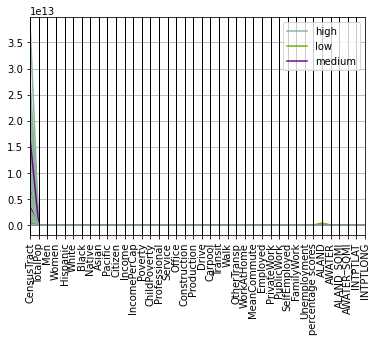

In [78]:
# your code
from pandas.plotting import parallel_coordinates
# Make the plot
parallel_coordinates(df_plot, 'IncomeClass' )
plt.xticks(rotation=90)
plt.show()

## Advanced Visualization: Map

**d)** In this task, you are going to create an advanced visualization that exploits the geospatial nature of the data, that is, you will project the average 'Income' of each county and its population onto a map of the USA. \
You can use the following code to create a suitable map extend.

    ax.set_extent([-125, -66.5, 20, 50], ...)
        
Given this instance, plot one marker (e.g., circular marker) for each row in our aggregated dataset onto the map.
The color encoding should show the average 'Income' of the corresponding county, while the size should be chosen according to its population ('TotalPop'). If you want to modify the dataframe, create a **working copy** beforehand.

What do you observe?


                     CensusTract  TotalPop          Men        Women  \
State   County                                                         
Alabama Autauga      12012247403   55221.0  3137.598649  3348.805491   
        Baldwin      31093340873  195121.0  3764.790094  3934.166712   
        Barbour       9053554500   26932.0  1833.253973  1491.941185   
        Bibb          4028040010   22604.0  3450.611352  2930.106309   
        Blount        9081453506   57710.0  3456.492358  3562.080783   
...                          ...       ...          ...          ...   
Wyoming Sweetwater  672455650809   44772.0  2243.544715  2068.200482   
        Teton       224159870803   22311.0  3337.692842  3082.535431   
        Uinta       168125925900   20930.0  3547.860440  3437.930387   
        Washakie    168129000803    8400.0  1400.359762  1436.780238   
        Weston      112091902400    7152.0  1841.860459  1739.160794   

                     Hispanic      White      Black    Native  

TypeError: Source CRS must be an instance of CRS or one of its subclasses, or None.

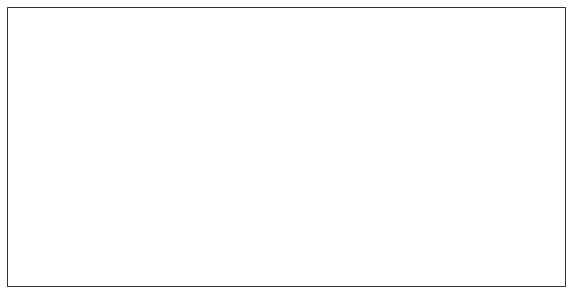

In [79]:
# your codeimport cartopy.crs as ccrs
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.preprocessing import MaxAbsScaler
df_map = df_plot.copy()
df_map['average-Income'] = df_map['Income']/df_map['Income'].sum()
print(df_map)
# Create projection
proj = ccrs.PlateCarree()
# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=proj)
ax.set_extent([-125, -66.5, 20, 50], ...)
ax.scatter(df_map['average-Income'], df_map['TotalPop'], color="average-Income", c=np_size, marker='c')
# Add colorbar to the plot
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size='5%', pad=0.2, axes_class=plt.Axes)
fig.add_axes(cax)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cax, orientation='vertical')
cbar.set_label("Average income", rotation=270)
# Figure title
fig.suptitle('population of the country')
fig.tight_layout()
plt.show()

# Q3 - Frequent Itemsets and Association Rules (12 points)


## Frequent Itemsets

**a)** Carry out some preprocessing steps before starting the analysis:

1) Load the `customer_data.csv`.

2) Select 90% of the `customer_data` dataset by random sampling. Use the matriculation number of one of the group members as seed.

3) After completing this preprocessing step, export your final dataset as `customer_data_2.csv` and use it for the next steps of the assignment.

In [91]:
# your code
dft = pd.read_csv('dataset/customer_data.csv')
print(dft.shape)
customer_data_2 = dft.sample(frac=0.95, random_state=404073)
# # #Export the dataset
customer_data_2.to_csv('dataset/customer_data_2', index=False)
print(customer_data_2.shape)
dft.head()

(2216, 10)
(2105, 10)


,Education,Marital_Status,Age_Group,Income_Class,Children,Wine_Preference,Fruit_Preference,Meat_Preference,Sweets_Preference,Purchase_Place
0,Graduation,Single,50s,Medium,No Children,Wine,Fruits,Meat,Sweets,Web
1,Graduation,Single,50s,Medium,Children,No Wine,No Fruits,No Meat,No Sweets,Store
2,Graduation,Together,40s,High,No Children,Wine,Fruits,Meat,Sweets,Store
3,Graduation,Together,20s,Medium,Children,No Wine,No Fruits,No Meat,No Sweets,Store
4,PhD,Married,30s,Medium,Children,Wine,Fruits,Meat,Sweets,Store


**b)** In this part, we want to get to know our customers by looking at the typical shared characteristics (e.g. "Married customers in their 40s like wine"). This would correspond to the itemset {Married, 40s, Wine}. 

1) Create a new dataframe called `customer_data_onehot` such that rows correspond to customers (as in the original data set) and columns correspond to the categories of each of the ten categorical attributes in the data. The new dataframe should only contain boolean values (True/False or 0/1s) such that the value in row $i$ and column $j$ is True (or 1) if and only if the attribute value corresponding to the column $j$ holds for the customer corresponding to row $i$. Display the dataframe.

*Hint: For example, for the attribute "Education" there are 5 possible categories: 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'. Therefore, the new dataframe must contain one column for each of those attribute values.* 

In [92]:
# your code
customer_data_2.columns
customer_data_onehot = pd.get_dummies(customer_data_2)
customer_data_onehot

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,...,Wine_Preference_No Wine,Wine_Preference_Wine,Fruit_Preference_Fruits,Fruit_Preference_No Fruits,Meat_Preference_Meat,Meat_Preference_No Meat,Sweets_Preference_No Sweets,Sweets_Preference_Sweets,Purchase_Place_Store,Purchase_Place_Web
1506,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1026,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,1,0,0,1,1,0
658,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,1,0,0,1,1,0
1127,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,0
2119,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,0,0,0,0,1,0,0,0,0,1,...,0,1,1,0,1,0,0,1,1,0
27,0,0,0,0,1,0,0,0,1,0,...,0,1,1,0,1,0,0,1,1,0
105,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,1,0,1,0,0,1
456,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0


In [93]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

2) Use the apriori algorithm to find the frequent itemsets with **min_support = 0.3** from the `customer_data_onehot` dataframe. Show the frequent itemsets that contain at least **3** items.

*Hint: The apriori algorithm of mlxtend needs a dataframe containing only boolean values as input.*

In [94]:
# your code
frequent_itemsets = apriori(customer_data_onehot, min_support = 0.3, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.504988,(Education_Graduation)
1,0.392874,(Marital_Status_Married)
2,0.382423,(Income_Class_High)
3,0.509739,(Income_Class_Medium)
4,0.714014,(Children_Children)
...,...,...
93,0.301188,"(Children_Children, Sweets_Preference_No Sweet..."
94,0.309739,"(Meat_Preference_No Meat, Children_Children, S..."
95,0.360570,"(Meat_Preference_No Meat, Sweets_Preference_No..."
96,0.319240,"(Meat_Preference_No Meat, Sweets_Preference_No..."


In [104]:
frequent_itemsets2 = get_freq_itemsets_by_size(frequent_itemsets, 3)
frequent_itemsets2

,support,itemsets
53,0.316390,"(Income_Class_High, Fruit_Preference_Fruits, W..."
54,0.355344,"(Income_Class_High, Meat_Preference_Meat, Wine..."
55,0.313064,"(Income_Class_High, Sweets_Preference_Sweets, ..."
56,0.314964,"(Income_Class_High, Fruit_Preference_Fruits, M..."
57,0.312589,"(Income_Class_High, Sweets_Preference_Sweets, ..."
58,0.369121,"(Income_Class_Medium, Children_Children, Fruit..."
59,0.330166,"(Meat_Preference_No Meat, Income_Class_Medium,..."
60,0.365796,"(Sweets_Preference_No Sweets, Income_Class_Med..."
61,0.313064,"(Income_Class_Medium, Children_Children, Purch..."
62,0.320190,"(Meat_Preference_No Meat, Income_Class_Medium,..."


**c)** In the following we will investigate the effect of using the apriori property when determining the candidates for the frequent itemsets.

1) Implement the following join- and prune steps of the Apriori algorithm: \
   **join function:** a function that, given the frequent itemsets of size k, generates and yields a list of itemsets of size k+1. Only itemsets that share exactly k elements should be merged. \
   **prune function:** Given the set of candidate itemsets of size k+1 and the set of frequent itemsets of size k, remove the candidate sets that contain an infrequent subset of size k and return the rest.

In [96]:
# your code (join function)
def apriori_join(L2):
    
    C3 = []
    
    for itemset1 in L2:
        for itemset2 in L2:
            # for any two pairs of frequent itemsets of size 2, compute their intersection
            intersec = set(itemset1).intersection(itemset2)
            if len(intersec) > 0:
                # if intersection has size 2-1=1, merge them and form new candidate set of size 3
                C3.append(set(itemset1).union(set(itemset2)))
    
    return C3

aprioriJoin = apriori_join(frequent_itemsets["itemsets"])

In [97]:
# your code (prune function)
def apriori_prune(C3, L2):
    
    C_pruned = []
    
    for candidate_set in C3:
        for (i,item) in enumerate(candidate_set):
            # since we want to modify the original set many times, each time we modify a copy of it
            candidate_copy = set(candidate_set).copy()
            # remove one of the 3 items, leaving a set of size 2
            candidate_copy.remove(item)
            # check if itemset of size 2 is frequent
            if candidate_copy not in L2:
                break #stop exploring this candidate set
            if i == len(candidate_set)-1:
                # if we make it thorugh all subsets of size 2, we keep the current candidate set of size 3
                C_pruned.append(candidate_set)
                    
    return C_pruned

aprioroPrune = apriori_prune(frequent_itemsets["itemsets"], aprioriJoin)

2) To see the effect of the apriori property, compare the number of candidate itemsets of size 4 obtained with and without pruning from the itemsets of size three for different values for min_support. To this end, generate a list of tuples *(min_sup, C4_size, C4_size_pruned, L4_size)* as follows:

For $\textrm{min_support} \in [0.1,0.2,...,0.8,0.9,1]$, repeat:

1. Obtain all frequent itemsets of size three using the apriori algorithm.

2. Using the result from 1., generate all itemsets of size four by applying your **join function** $\rightarrow$ C4_size.

3. Prune the result from 2. using your **prune function** $\rightarrow$ C4_size_pruned.

4. Compute the frequent itemsets of size four by using the apriori algorithm $\rightarrow$ L4_size.

In [98]:
# your code
def get_freq_itemsets_by_size(frequent_itemsets, size):
    
    data = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == size)]
    
    return data

def obtain_stats(dataset, min_sup_values):
    
    stats = []
    
    for value in min_sup_values:
        frequent_value = apriori(dataset, min_support=value, use_colnames=True)
        frequent_size2 = get_freq_itemsets_by_size(frequent_value, 4)

        if not frequent_size2.empty:
            L4 = frequent_size2['itemsets'].tolist()
            C4_all = apriori_join(L4)
            C4_pruned = apriori_prune(C4_all, L4)
            stats.append((value, len(C4_all), len(C4_pruned), L4))
    
    return stats

min_sup_values = np.arange(0.1,1,0.1)
stats = obtain_stats(customer_data_onehot, min_sup_values)

min_sup, C4_size, C4_size_pruned, L4_size = zip(*stats) 
x_axis = min_sup_values

3) Plot the number of candidate sets with and without pruning and the number of frequent itemsets of size four against the corresponding min_sup value. Interpret the plot.

In [99]:
C4_size_pruned = list(C4_size_pruned)
C4_size = list(C4_size)
for i in range(len(C4_size_pruned),9):
    C4_size_pruned.append(0)

for i in range(len(C4_size),9):
    C4_size.append(0)

C4_size
C4_size_pruned

[3640, 540, 20, 0, 0, 0, 0, 0, 0]

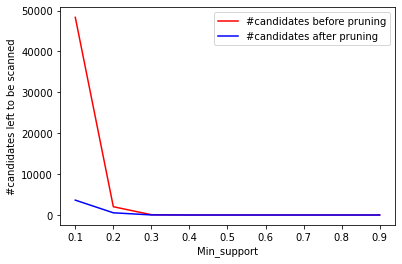

In [100]:
# your code
plt.plot(x_axis, C4_size, color='red', label='#candidates before pruning')
plt.plot(x_axis, C4_size_pruned, color='blue', label='#candidates after pruning')
plt.legend()
plt.xlabel('Min_support')
plt.ylabel('#candidates left to be scanned')
plt.show()

C:\Users\Abdul Qadir Khan\anaconda3\envs\IDS20212\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


TypeError: unhashable type: 'list'

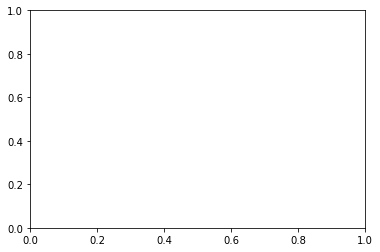

In [101]:
# your code
L4_size = list(L4_size)
plt.plot(min_sup, L4_size, color='red', label='#number of frequent itemsets')
plt.xlabel('#L4_size')
plt.ylabel('Min_support')
plt.show()

*Your markdown for your discussion.*

d) Use the FP-Growth algorithm to obtain all frequent itemsets with **min_support = 0.3** from `customer_data_onehot`.

## Association Rules

**d)** In the following, you should generate association rules from the frequent itemsets.

1) Using only the frequent itemsets with min_support=0.3, generate different association rules using minimum confidence equal to 0.6 as a metric. Show the association rules.

In [102]:
# your code
assoc_rules_conf_02 = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
assoc_rules_conf_02

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Education_Graduation),(Children_Children),0.504988,0.714014,0.359620,0.712135,0.997369,-0.000949,0.993473
1,(Education_Graduation),(Purchase_Place_Store),0.504988,0.695487,0.350594,0.694262,0.998238,-0.000619,0.995992
2,(Income_Class_High),(Wine_Preference_Wine),0.382423,0.579097,0.371496,0.971429,1.677487,0.150036,14.731591
3,(Wine_Preference_Wine),(Income_Class_High),0.579097,0.382423,0.371496,0.641509,1.677487,0.150036,1.722715
4,(Income_Class_High),(Fruit_Preference_Fruits),0.382423,0.457957,0.321140,0.839752,1.833690,0.146007,3.382515
...,...,...,...,...,...,...,...,...,...
359,"(Sweets_Preference_Sweets, Wine_Preference_Wine)","(Fruit_Preference_Fruits, Meat_Preference_Meat)",0.392874,0.399525,0.324941,0.827086,2.070173,0.167978,3.472677
360,"(Wine_Preference_Wine, Meat_Preference_Meat)","(Fruit_Preference_Fruits, Sweets_Preference_Sw...",0.485986,0.369121,0.324941,0.668622,1.811388,0.145553,1.903803
361,(Fruit_Preference_Fruits),"(Wine_Preference_Wine, Sweets_Preference_Sweet...",0.457957,0.380523,0.324941,0.709544,1.864656,0.150678,2.132772
362,(Sweets_Preference_Sweets),"(Wine_Preference_Wine, Fruit_Preference_Fruits...",0.458907,0.379097,0.324941,0.708075,1.867791,0.150970,2.126922


2) From the association rules obtained in task (d) 1), provide the three rules with the highest lift. Comment on them.

In [103]:
# filtered_rules = assoc_rules_conf_02.loc[(assoc_rules_conf_02['lift'] > 2.12)]
assoc_rules_conf_02.sort_values(by = "lift", ascending=False)
filtered_rules = assoc_rules_conf_02.loc[(assoc_rules_conf_02['lift'] > 2.18)]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
237,"(Income_Class_High, Meat_Preference_Meat)","(Fruit_Preference_Fruits, Wine_Preference_Wine)",0.360095,0.395724,0.311164,0.864116,2.183631,0.168665,4.446999
240,"(Fruit_Preference_Fruits, Wine_Preference_Wine)","(Income_Class_High, Meat_Preference_Meat)",0.395724,0.360095,0.311164,0.786315,2.183631,0.168665,2.994612
249,"(Income_Class_High, Meat_Preference_Meat)","(Sweets_Preference_Sweets, Wine_Preference_Wine)",0.360095,0.392874,0.309739,0.860158,2.189399,0.168267,4.341523
252,"(Sweets_Preference_Sweets, Wine_Preference_Wine)","(Income_Class_High, Meat_Preference_Meat)",0.392874,0.360095,0.309739,0.788392,2.189399,0.168267,3.024008


# Q4 - Text Mining (15 points)
In this question, you will use the scripts of some Harry Potter movies. First, you will try to predict the character given a line in the script. Afterwards, using N-grams, you will generate sentences for some of the characters.

**a)** In this part, you will preprocess and reconstruct the data to make it suitable for the following tasks.

1) Load each of the datasets <b>hp_1.csv</b>, <b>hp_2.csv</b>, and <b>hp_3.csv</b> into its own dataframe and show the set of characters (here: a fictional character) appearing in each dataset.

In [26]:
# your code
df1 = pd.read_csv('dataset/hp_1.csv')
df2 = pd.read_csv('dataset/hp_2.csv')
df3 = pd.read_csv('dataset/hp_3.csv')
df3.head()

,Character,Sentence
0,HARRY,Lumos Maxima...
1,HARRY,Lumos Maxima...
2,HARRY,Lumos Maxima...
3,HARRY,Lumos... MAXIMA!
4,AUNT PETUNIA,Harry! Harry!


In [27]:
print(f'\033[1mCharacters in hp_1:\033[0m {df1["Character"].unique()}')
print(f'\033[1mCharacters in hp_2:\033[0m {df2["Character"].unique()}')
print(f'\033[1mCharacters in hp_3:\033[0m {df3["Character"].unique()}')

Characters in hp_1: ['Dumbledore' 'McGonagall' 'Hagrid' 'Petunia' 'Dudley' 'Vernon' 'Harry'
 'Snake' 'Someone' 'Barkeep\xa0Tom' 'Man' 'Witch' 'Quirrell' 'Boy'
 'Goblin' 'Griphook' 'Ollivander' 'Trainmaster' 'Mrs. Weasley' 'George'
 'Fred' 'Ginny' 'Ron' 'Woman' 'Hermione' 'Neville' 'Malfoy' 'Whispers'
 'Sorting Hat' 'Seamus' 'Percy' 'Sir Nicholas' 'Girl' 'Man in paint'
 'Fat Lady' 'Snape' 'Dean' 'Madam Hooch' 'Class' 'Harry ' 'Fred  ' 'Ron  '
 'George  ' 'Harry  ' 'Hermione  ' 'Ron ' 'Hermione ' 'Filch' 'All  '
 'Oliver ' 'Oliver  ' 'Flitwick' 'Draco  ' 'Flitwick  ' 'Seamus  '
 'Girl  ' 'Boy  ' 'Percy  ' 'McGonagall ' 'Ron and Harry' 'McGonagall  '
 'Quirrell  ' 'Snape  ' 'OIiver  ' 'Lee Jordan' 'Hagrid ' 'Gryffindors  '
 'Flint  ' 'Crowd  ' 'Flint' 'Hagrid  ' 'Man  ' 'Lee  Jordan'
 'Madam Hooch ' 'Quirrell ' 'Filch  ' 'Dumbledore  ' 'Hermoine'
 'Ron and Harry  ' 'All 3  ' 'Filch ' 'Firenze  ' 'Firenze ' 'Snape '
 'Neville  ' 'Ron   ' 'Voldemort ' 'Voldemort' 'Voldemort  ' 'Dumbledore '

2) Merge the three datasets into a single dataframe called `hp_df` that comprises only the lines spoken from one of the four characters *Harry, Hermione, Dumbledore, and Snape*. Your new dataframe must contain two columns: one for the (four) characters and the other for the lines. You can name those columns "Character" and "Sentence" as in the original data. \
    Make sure that `hp_df` contains a single unique spelling for each of the characters. \
    Make sure that `hp_df` includes all lines (here: script lines) of a character even if this character is spelled slightly differently (e.g., Dumbledore or dumbledore) in the original dataset. \
    Show the first few lines of your dataframe.
    
*Hint: Be aware of white space characters!*

In [28]:
# your code
df1_harry =  df1[df1['Character'] == 'Harry']
df2_harry = df2[df2['Character'] == 'Harry']
df3_harry = df3[df3['Character'] == 'Harry']

df1_Hermione =  df1[df1['Character'] == 'Hermione']
df2_Hermione = df2[df2['Character'] == 'Hermione']
df3_Hermione = df3[df3['Character'] == 'Hermione']

df1_Dumbledore =  df1[df1['Character'] == 'Dumbledore']
df2_Dumbledore = df2[df2['Character'] == 'Dumbledore']
df3_Dumbledore = df3[df3['Character'] == 'Dumbledore']

df1_Snape =  df1[df1['Character'] == 'Snape']
df2_Snape = df2[df2['Character'] == 'Snape']
df3_Snape = df3[df3['Character'] == 'Snape']

#sentence.strip()
hp_df = pd.concat([df1_harry, df2_harry, df3_harry, df1_Hermione, df2_Hermione, df3_Hermione, df1_Dumbledore, df2_Dumbledore, df3_Dumbledore, df1_Snape, df2_Snape, df3_Snape])
hp_df

,Character,Sentence
36,Harry,"Yes, Aunt Petunia."
39,Harry,"Yes, Uncle Vernon."
59,Harry,He's asleep!
61,Harry,Sorry about him.
62,Harry,"He doesn't understand what it's like, lying th..."
...,...,...
594,Snape,A bezoar is a stone taken from the stomach of ...
595,Snape,"As for monkshood and wolfsbane, they are the s..."
596,Snape,Well...
597,Snape,Why aren't you all copying this down?


3) Create the `hp_sampled` dataset which includes 90% of the `hp_df` data. Use the matriculation number of one of the group members as seed. Export the sampled dataset. 

In [30]:
# your code
hp_sampled = hp_df.sample(frac=0.9,random_state=414354)
hp_sampled.to_csv('hp_sampled.csv', encoding='utf-8', index=None)

hp_sampled

,Character,Sentence
356,Harry,Platform 9 3/4?
361,Harry,Excuse me. Excuse me.
614,Harry,"The vault in question, number 713, had, in fac..."
611,Harry,Hey Ron! Somebody broke into Gringotts.
576,Snape,I can tell you how to bottle fame brew glory a...
...,...,...
4,Dumbledore,The good and the bad.
16,Dumbledore,"Albus, do you really think it's safe, leaving ..."
606,Harry,Can I borrow this? Thanks.
62,Harry,"He doesn't understand what it's like, lying th..."


**b)** In this part, you are going to train a classifier that, given a line from the script, predicts the character. For each character, the data contains many sentences belonging to that character. Note that sometimes the "Sentence" column in the original dataset contains more than one sentence. The set of sentences for each character should be seen as the set of example documents belonging to that character (the class). Each individual sentence is a single document. The whole corpus consists of all the individual sentences.

1) Create a new dataframe called `hp_processed` from the dataframe `hp_sampled` such that the new dataframe contains again the columns "Character" and "Sentence", but every entry in the "Sentence" column must be a single sentence. Display the shape of the dataframe and compare it to the shape of `hp_sampled`.

In [ ]:
# your code

2) Split the preprocessed data `hp_processed` into training (80%) and test (20%) data preserving the distribution based on "Character". 

In [ ]:
# your code

3) Preprocess the training and test corpus (to lowercase, no punctuation, tokenization, lemmatization, and stopword removal) and obtain a boolean document-term matrix (i.e, each row in the matrix contains only 1s and 0s depending on whether a particular word appears in a sentence or not). Train a logistic classifier on the training corpus with the character as target feature. Use the classifier to predict the character of the sentences in the test corpus and show its accuracy on the test corpus. Comment on the result.

In [ ]:
# your code

*Your markdown for your discussion.*

4) Next, you are going to perform the same predicting task based on doc2vec.

1. Preprocess the training corpus (to lowercase, no punctuation, tokenization, lemmatization, and stopword removal). 
2. Create a doc2vec model to reduce the dimension of the document vector. Choose a vector size 4-8 and ignore all words whose count is lower than 3.
3. Train the doc2vec model on the training data (thus creating an embedding).
4. Use the created embedding to convert the training set to a set of document vectors.
5. Train a logistic classifier on the train data with the character as target feature.
6. Show the accuracy of prediction on the test data and comment on it.

In [ ]:
# your code

In [ ]:
# your code

In [ ]:
# your code

**c)** For the following tasks use the `hp_processed` (the data before splitting into training and test data).

1) For each character, create a list containing all sentences of that character.
    For each character separately, build a bigram language model using MLE. Do not perform stemming and stopword removal for this task, but apply other preprocessing steps such as to lowercase, no punctuation, and tokenization. Use both right and left padding.

In [ ]:
# your code

2) For each character, use the created language model to generate a sentence of ten words. Display the sentences.

In [ ]:
# your code

3) Build a 4-gram model with the same data as in the previous task. Use both right and left padding.

In [ ]:
# your code

4) For each character, use the created 4-gram language model to generate a sentence of ten words. Display the sentences.

In [ ]:
# your code

5) Compare the sentences generated by the bigram model with the sentences generated by the 4-gram model.

*Your markdown for your discussion.*

# Q5 - Process Mining (23 points)

In this task, we consider a simulated process of students that participate in an online course.
The course comprises 6 batches of lecture material as well as a mandatory assignment to be delivered in two parts. (Note that in this process, it is not required to achieve a certain score in the assignment in order to be admitted to the exam.)

While there are strict deadlines for the assignment and the exam, there is only a recommended schedule for the lecture material (i.e., consume material in order).

The system logs for every student, among other activities, when he downloads a certain lecture material batch. 

## Loading the Data and Basic Statistics

**a)** Load the data **log.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - 'Activity' is the activity key
 - 'Student' is the case ID
 - 'Timestamp' is the timestamp

In [31]:
### PM4Py
import pm4py
# Log Handling
from pm4py.objects.conversion.log import converter as log_converter
# Statistics
from pm4py.statistics.traces.generic.log import case_statistics
# Filtering
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.algo.filtering.log.attributes import attributes_filter
# Discovery and Conformance Checking
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.objects.conversion.process_tree import converter as pt_converter
# Visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [32]:
### Data Handline
import pandas as pd
import numpy as np
from pm4py.objects.log.util import dataframe_utils
# Your code

df = pd.read_csv('dataset/log.csv')
display(df.head())
df2 = pm4py.format_dataframe(df, case_id='Student', activity_key='Activity', timestamp_key='Timestamp')
display(df2.head())
log_csv = dataframe_utils.convert_timestamp_columns_in_df(df2)

# Creating event log
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'case:concept:name'}
event_log = log_converter.apply(log_csv, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)

#log_csv = log_csv.sort_values('<timestamp_column>')
#event_log = log_converter.apply(log_csv)

,Timestamp,Student,Activity,Lifecycle,Points
0,2021-09-15 00:18:18,346630,Register,complete,NaN
1,2021-09-15 00:27:35,351651,Register,complete,NaN
2,2021-09-15 01:23:21,343682,Register,complete,NaN
3,2021-09-15 01:37:35,343951,Register,complete,NaN
4,2021-09-15 01:55:36,348017,Register,complete,NaN


,time:timestamp,case:concept:name,concept:name,Lifecycle,Points,@@index
1413,2021-10-05 21:29:31+00:00,343516,Register,complete,NaN,1413
6537,2021-12-03 08:30:11+00:00,343516,Assignment 1,complete,78.0,6537
7060,2021-12-03 21:39:25+00:00,343516,Consume Lecture Material 3,complete,NaN,7060
8198,2021-12-05 04:04:49+00:00,343516,Consume Lecture Material 1,complete,NaN,8198
8868,2021-12-06 05:21:45+00:00,343516,Consume Lecture Material 2,complete,NaN,8868


**b)** Compute the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [33]:
from pm4py.objects.log.util import sorting
event_log_sorted = sorting.sort_timestamp(event_log)
# Your code
print(f'\033[1mNumber of events:\033[0m {len(attributes_filter.get_attribute_values(event_log, "concept:name"))}')
print(f'\033[1m\nNumber of cases:\033[0m {len(event_log)}')
print(f'\033[1mEarliest timestamp:\033[0m {event_log_sorted[0][0]["time:timestamp"]}')
print(f'\033[1mLatest timestamp:\033[0m {event_log_sorted[-1][-1]["time:timestamp"]}')
print(f'\033[1mNumber of trace variants:\033[0m {len(variants_filter.get_variants(event_log))}')

Number of events: 12

Number of cases: 2000
Earliest timestamp: 2021-09-15 00:18:18+00:00
Latest timestamp: 2022-02-20 14:00:00+00:00
Number of trace variants: 432


**c)** Usually, it is insightful to have a look at the distribution of the variants in terms of how often a certain variant is present in the log.
Therefore, create a **scatter plot** that shows the distribution of the variants as follows:
- x-axis: The variants (in ascending order of their support)
- y-axis: Frequency of the variant in the log (total or relative)

In [105]:
# Your code

variants_count = variants_filter.get_variants(event_log)


**d)** While the variant distribution shows potential standard process executions in terms of the activity ordering, the distribution of the case durations shows the typical timeframe of cases.
Create a histogram plot over the case durations. For the sake of readability, make sure that the x-axis labels (in this case the case durations) have an easily readable format, that is, your x-axis labels should look like this:
<br></br>
<div>
<img src="templates/caseDurationXAxis.png" width="500"/>
</div>

In [5]:
# your code

## Discovery and Conformance Checking
Next, you are going to discover process models for different perspectives on the process. Moreover, you will evaluate how well the process models can represent the behavior present in the log (i.e., the fitness of the models).

### Filtering

**e)** Before discovering models, create three addtional perspectives onto the process by creating three additional event log from the log loaded in a):

1. Log containing only 30% of the most frequent traces (**log_varaint03**)
2. Log containing only 50% of the most frequent traces (**log_varaint05**)
3. Log containing only students that take the exam, that is, cases that end with 'Exam' (**log_exam**)

In [6]:
# your code
# 30% most frequent event logs
log_varaint03 = variants_filter.filter_log_variants_percentage(event_log, percentage=0.3)
log_varaint05 = variants_filter.filter_log_variants_percentage(event_log, percentage=0.5)
log_exam = attributes_filter.apply(event_log, ["Exam"],
                                                  parameters={attributes_filter.Parameters.ATTRIBUTE_KEY: 'concept:name',
                                                              attributes_filter.Parameters.POSITIVE: True})

print(log_varaint03)

[{'attributes': {'concept:name': '343526'}, 'events': [{'time:timestamp': Timestamp('2021-10-11 10:31:23+0000', tz='UTC'), 'concept:name': 'Register', 'Lifecycle': 'complete', 'Points': nan, '@@index': 1825}, '..', {'time:timestamp': Timestamp('2022-02-20 14:00:00+0000', tz='UTC'), 'concept:name': 'Exam', 'Lifecycle': 'complete', 'Points': 85.0, '@@index': 17941}]}, '....', {'attributes': {'concept:name': '354554'}, 'events': [{'time:timestamp': Timestamp('2021-09-16 21:14:39+0000', tz='UTC'), 'concept:name': 'Register', 'Lifecycle': 'complete', 'Points': nan, '@@index': 103}, '..', {'time:timestamp': Timestamp('2022-02-20 14:00:00+0000', tz='UTC'), 'concept:name': 'Exam', 'Lifecycle': 'complete', 'Points': 85.0, '@@index': 18393}]}]


### Inductive Miner and Replay Fitness

**f)** To get a better understanding of the processes in our four event logs (base log + three additional logs), create processes models using the **Inductive Miner**.
Concretely, for each of the 4 event logs, create two process models using the Inductive Miner with noise threshold **0 and 0.2**. Moreover, to access how well the model presents the logged behavior, apply conformance checking in terms of token-based replay to the model and the log from which it has been mined. Visualize each model as a process tree and as the corresponding Petri net.

In total, your cells should output 8 conformance scores, 8 process trees, and 8 Petri nets (for each log + noise threshold combination). Make sure that it is clear which model and conformance score belongs to log and parameter configuration.

For example, your output can look like this
#### Log: Base
##### IM threshold 0
>Fitness score

>Picture of the process tree

>Picture of the Petri net

##### IM threshold 0.2
>Fitness score

>Picture of the process tree

>Picture of the Petri net

**Describe your results**. How well do the models fit and, in particular, how do the models for
- log_variant05 and log (base log)
- log_variant05 and log_variant03
- log base and log_exam

differ in terms of the behavior that they allow?


In [7]:
# Noise threshold for base
event_log_0_2 = pm4py.discover_process_tree_inductive(event_log, noise_threshold=0.2)

# Noise threshold for 30%

log_varaint03_0_2 = pm4py.discover_process_tree_inductive(log_varaint03, noise_threshold=0.2)

# Noise threshold for 50%
log_varaint05_0_2 = pm4py.discover_process_tree_inductive(log_varaint05, noise_threshold=0.2)

# Noise threshold for exam log
log_exam_0_2 = pm4py.discover_process_tree_inductive(log_exam, noise_threshold=0.2)

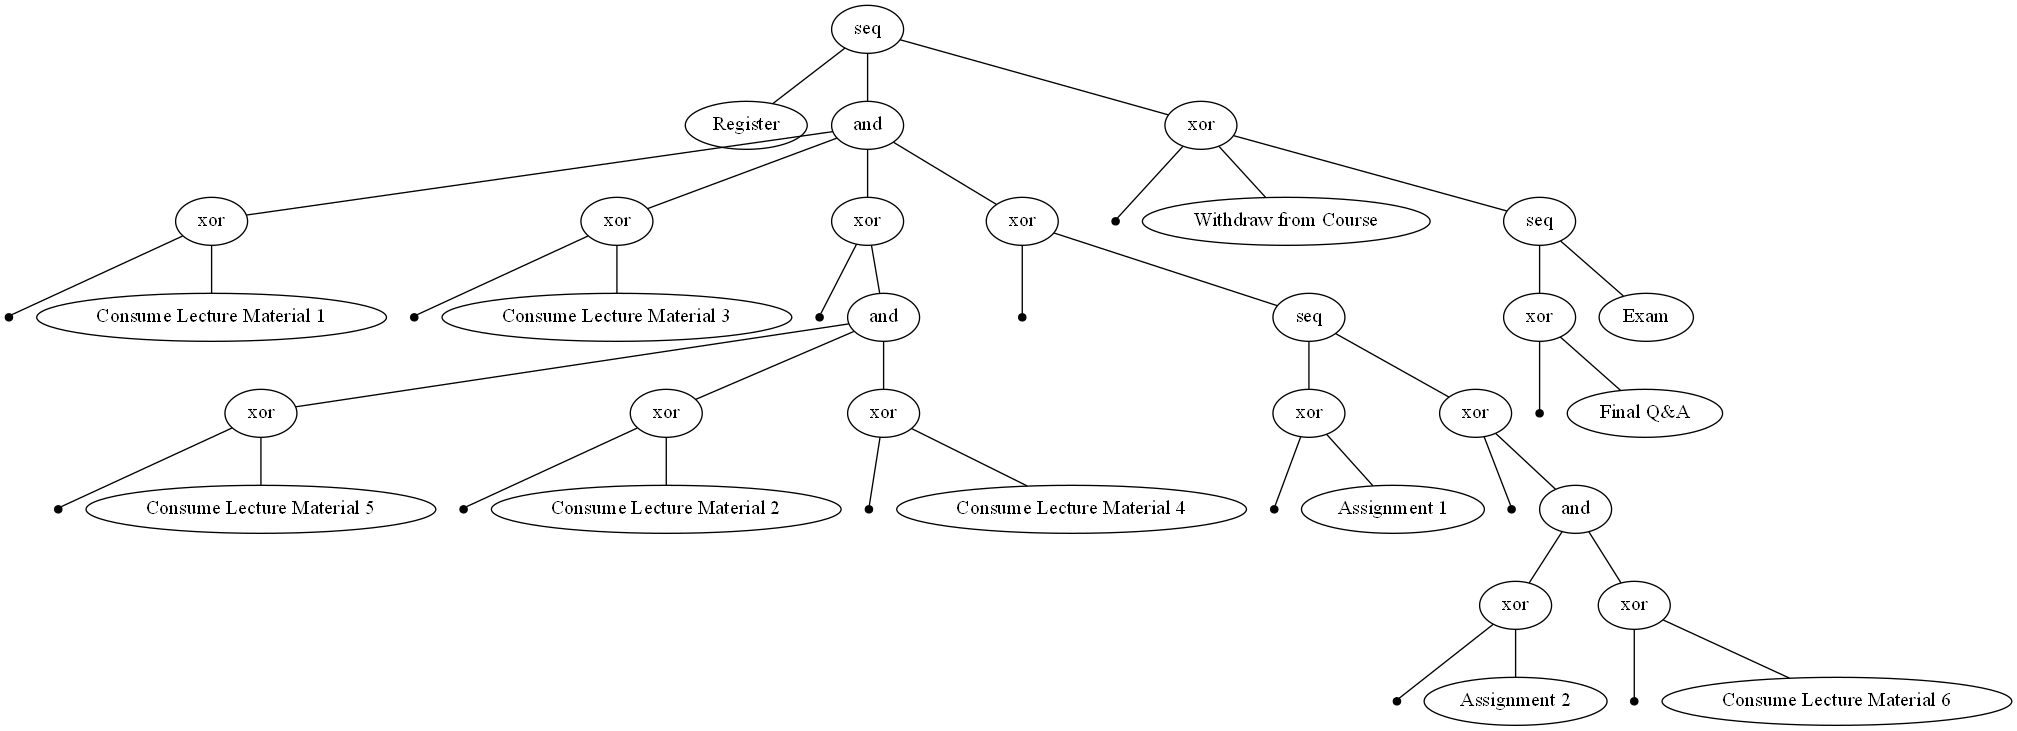

In [8]:
# Mining for a process tree for base 0 noise
tree_base = pm4py.discover_process_tree_inductive(event_log)
gviz = pt_visualizer.apply(tree_base, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)


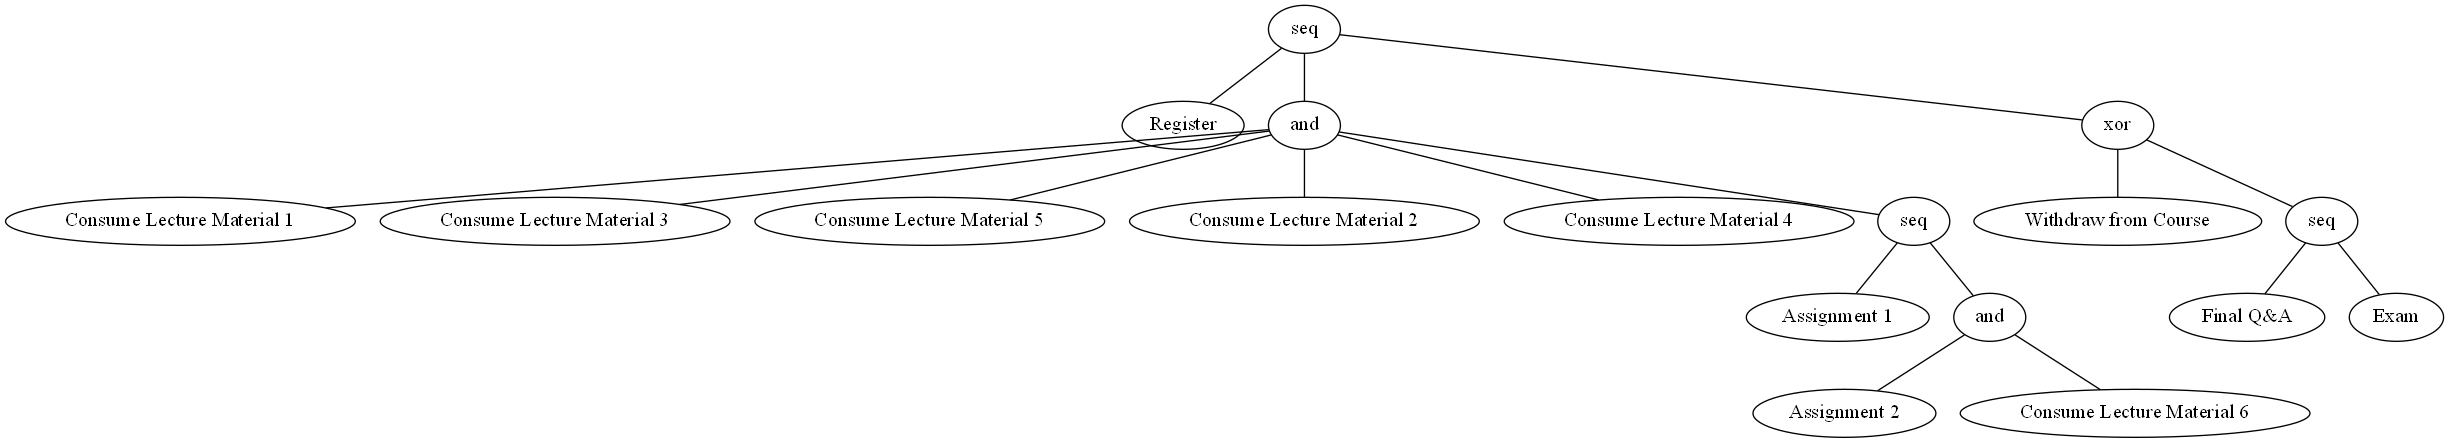

In [9]:
# Mining for a process tree for base 0.2 noise
gviz = pt_visualizer.apply(event_log_0_2, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

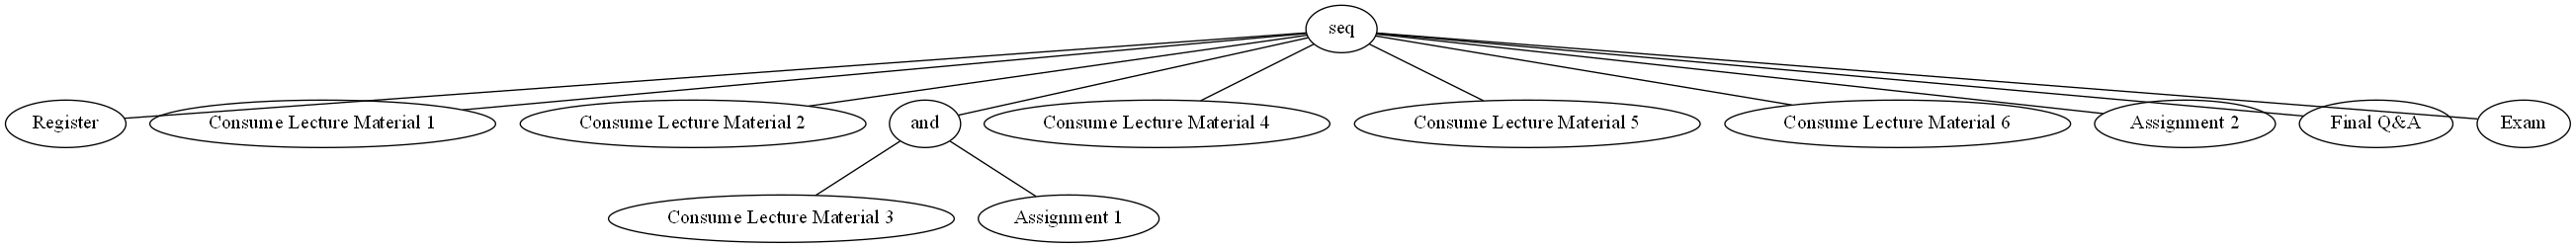

In [10]:
# Mining for a process tree for 30% with 0 noise
tree_30 = pm4py.discover_process_tree_inductive(log_varaint03)
gviz = pt_visualizer.apply(tree_30, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

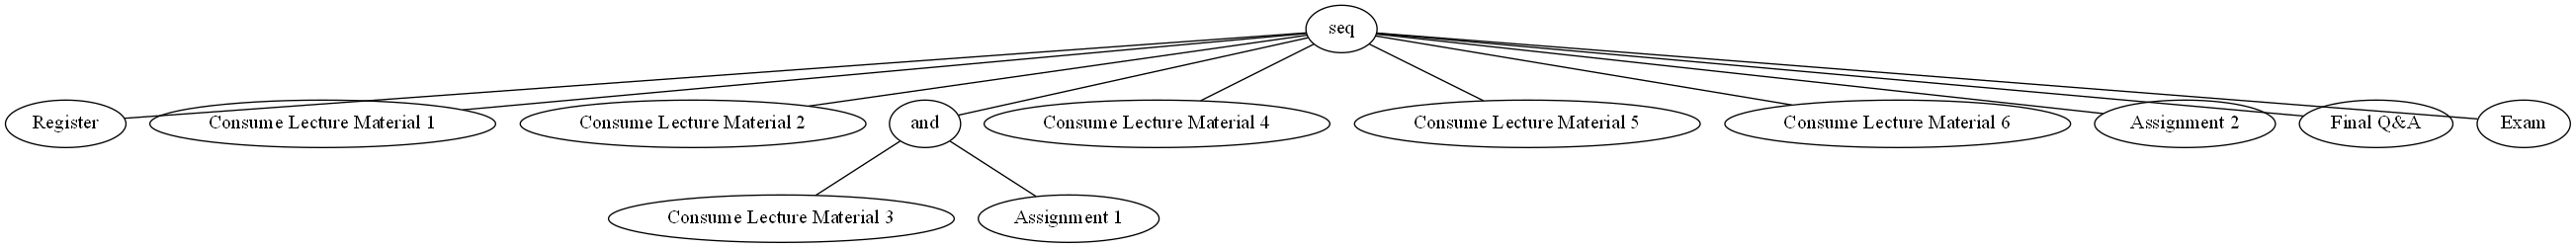

In [11]:
# Mining for a process tree for 30% with 0.2 noise
gviz = pt_visualizer.apply(log_varaint03_0_2, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)


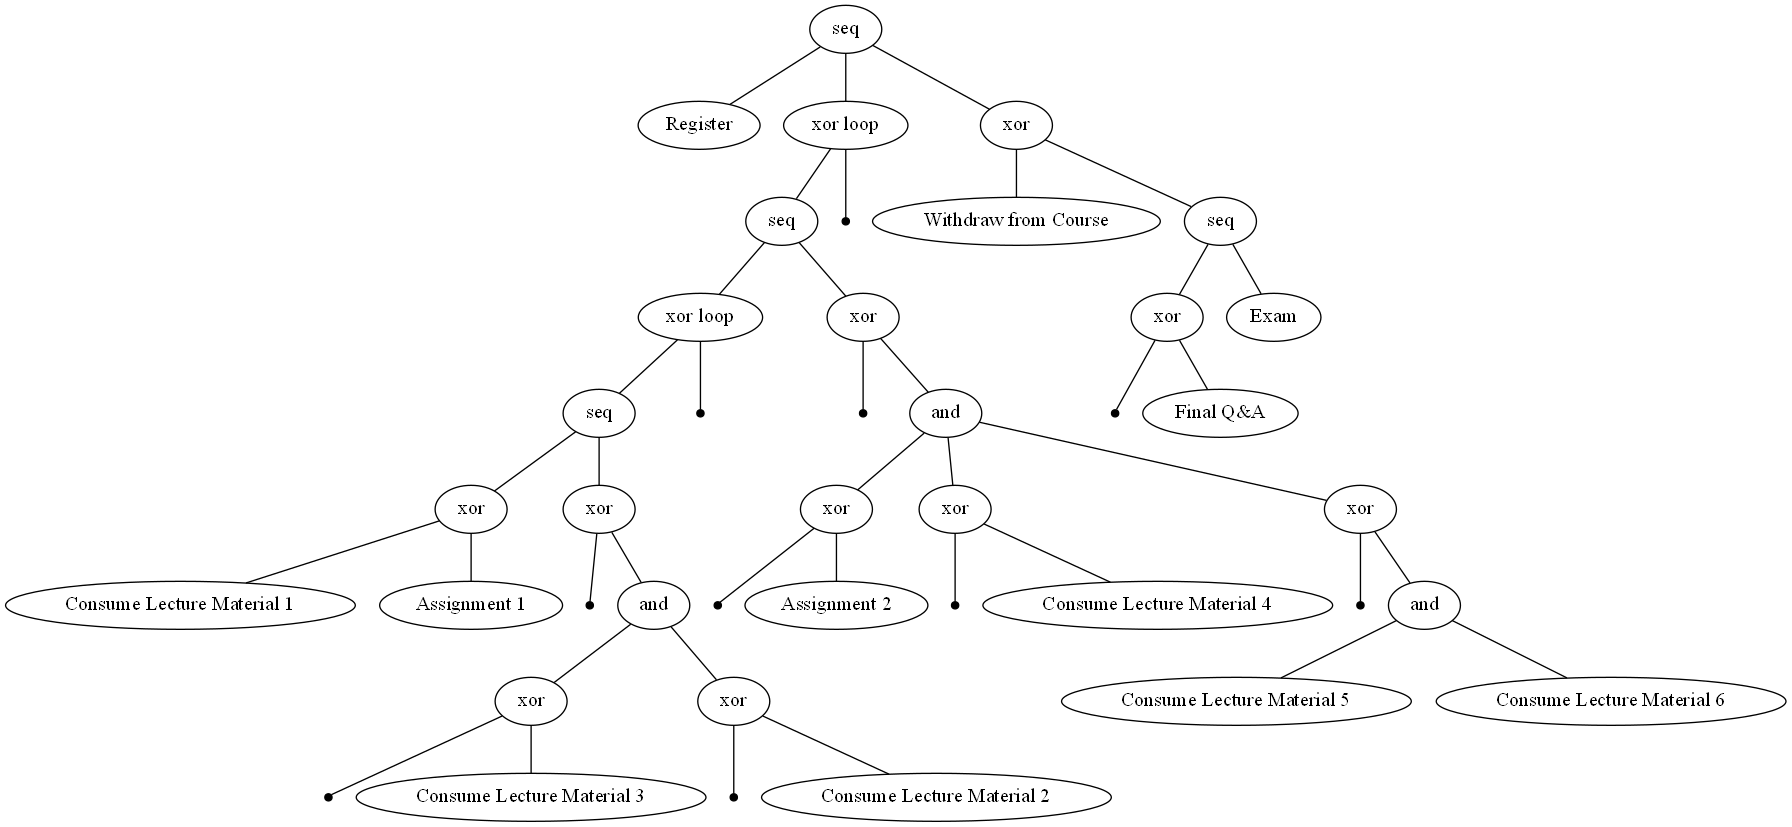

In [12]:
# Mining for a process tree for 50% with 0 noise
tree_50 = pm4py.discover_process_tree_inductive(log_varaint05)
gviz = pt_visualizer.apply(tree_50, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

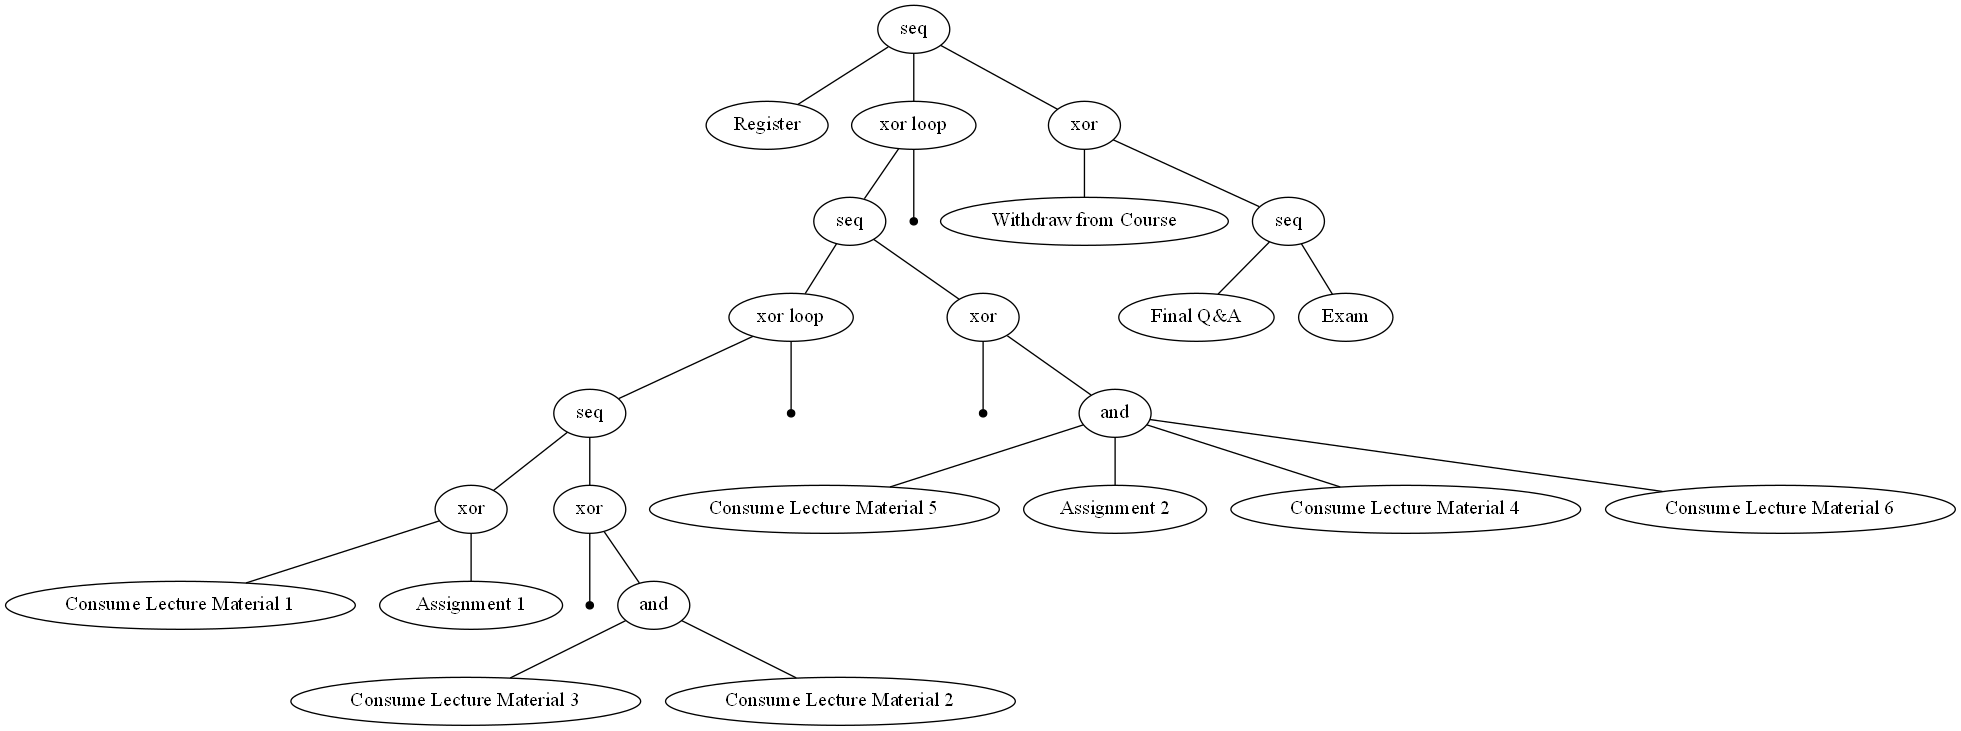

In [13]:
# Mining for a process tree for 50% with 0.2 noise
gviz = pt_visualizer.apply(log_varaint05_0_2, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

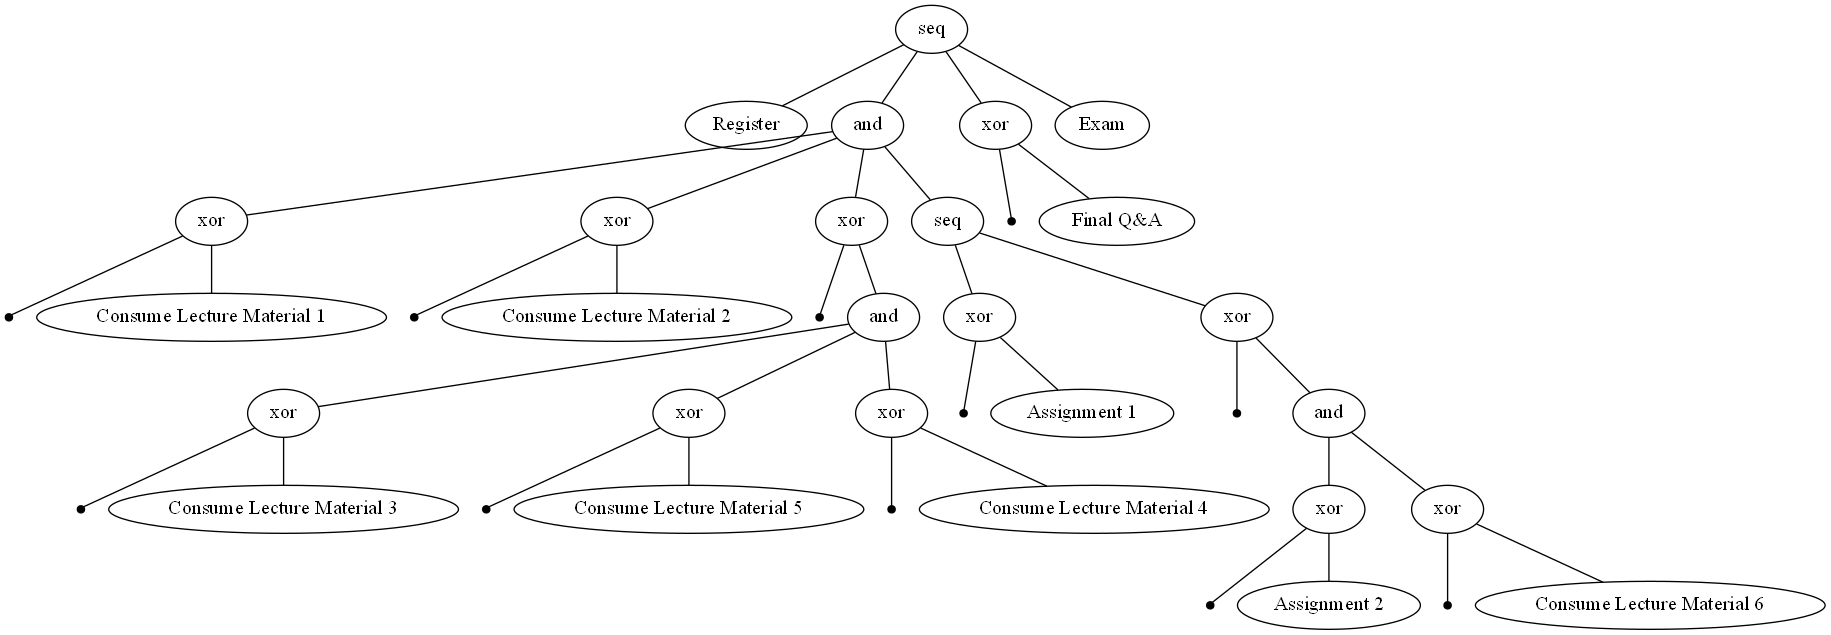

In [14]:
# Mining for a process tree for log exam with 0 noise
tree_exam = pm4py.discover_process_tree_inductive(log_exam)
gviz = pt_visualizer.apply(tree_exam, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

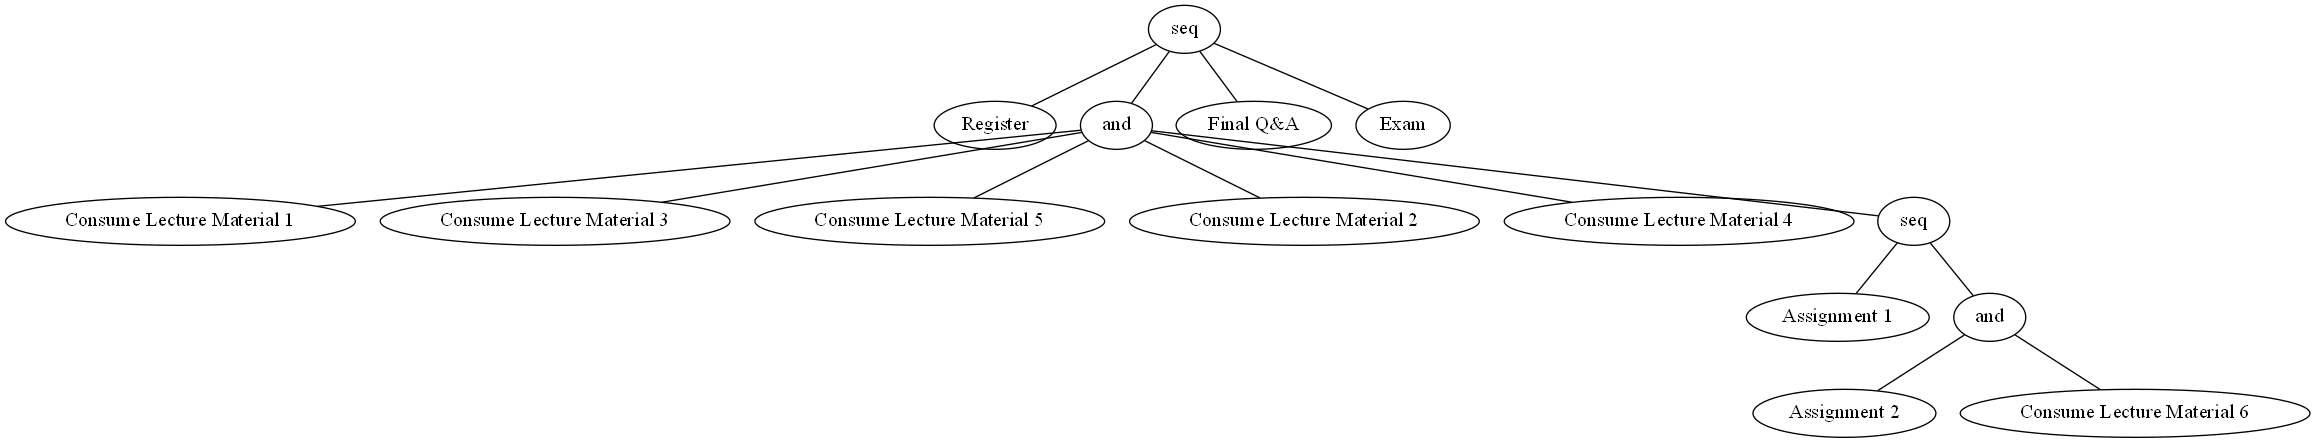

In [15]:
# Mining for a process tree for log exam with 0.2 noise
gviz = pt_visualizer.apply(log_exam_0_2, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

*Your markdown for your discussion.*

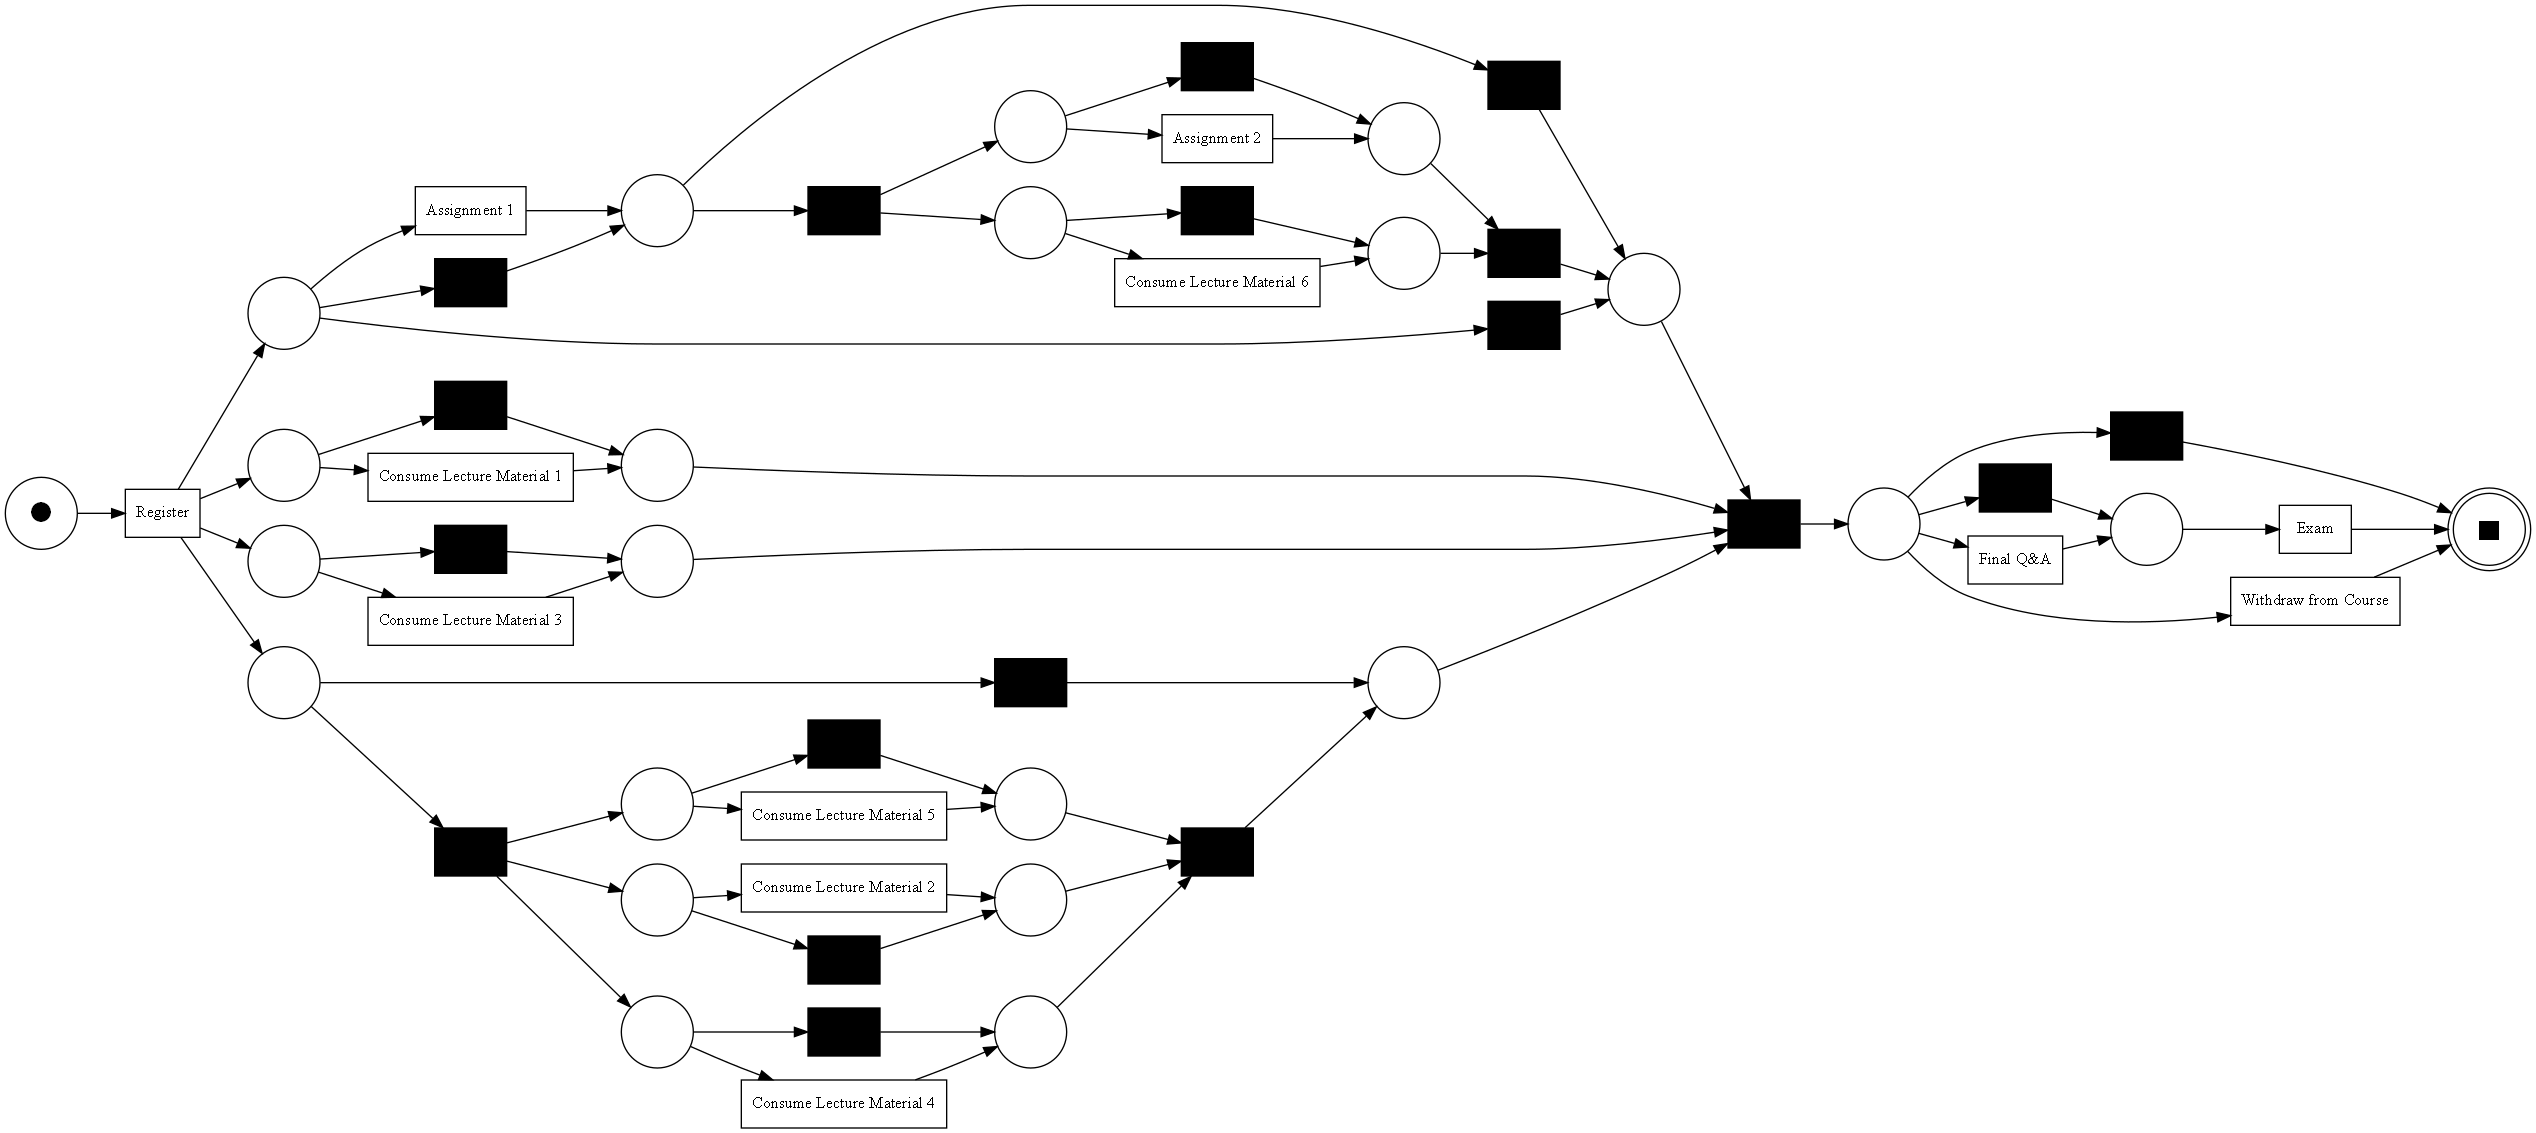

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [27]:
#petrinet for base with 0 noise
net, im, fm = pt_converter.apply(tree_base)
pm4py.view_petri_net(net, im, fm, format='png')

from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
# Computing trace fitness of base with 0 noise
token_replay_result = token_based_replay.apply(event_log, net, im, fm)
#display(token_replay_result[0])
fitness = replay_fitness_evaluator.apply(event_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness)

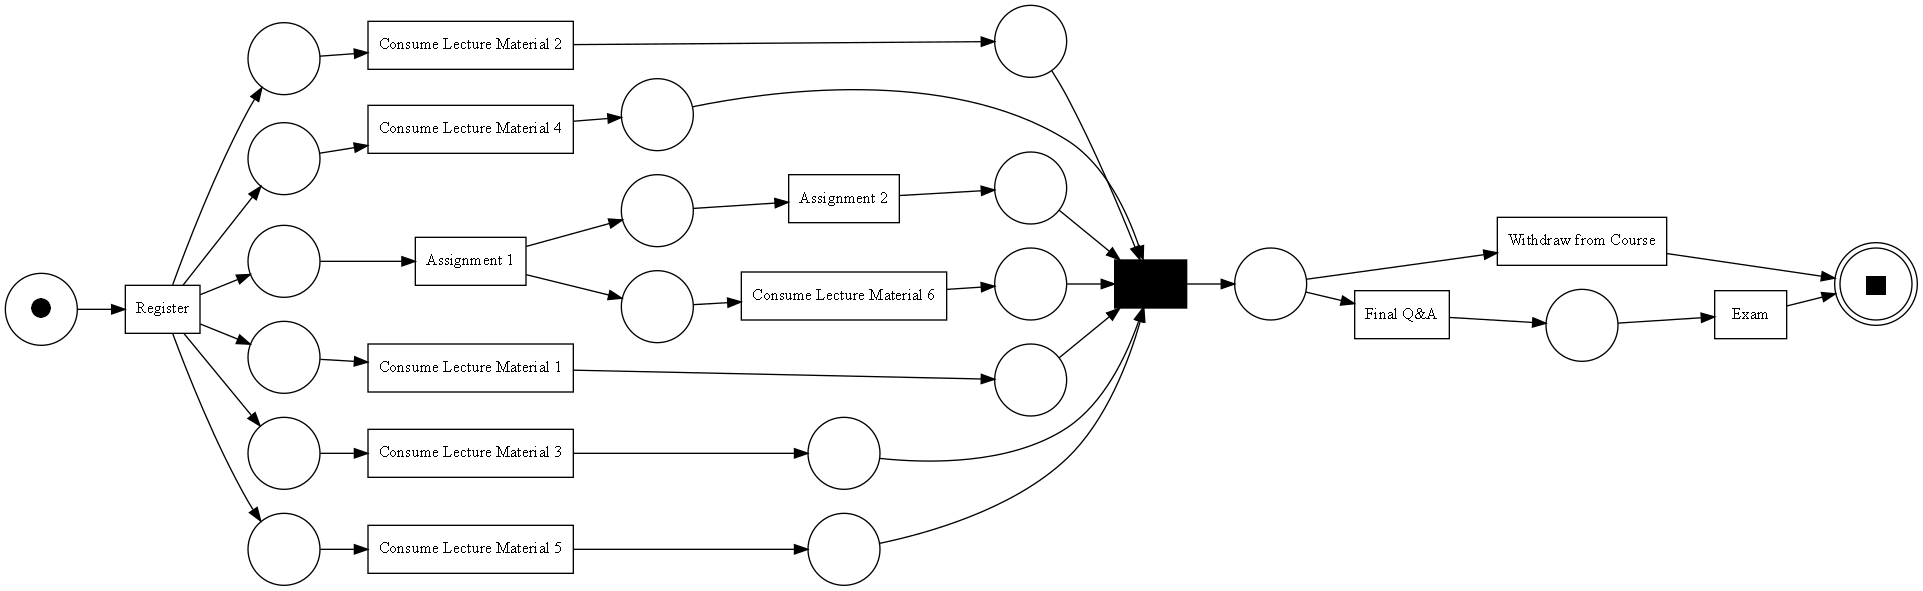

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

{'perc_fit_traces': 69.3,
 'average_trace_fitness': 0.905576373340711,
 'log_fitness': 0.9325048340840334,
 'percentage_of_fitting_traces': 69.3}

In [28]:
#petrinet for base with 0.2 noise
net, im, fm = pt_converter.apply(event_log_0_2)
pm4py.view_petri_net(net, im, fm, format='png')

# Computing trace fitness of base with 0 noise
token_replay_result = token_based_replay.apply(event_log, net, im, fm)
#display(token_replay_result[0])
fitness = replay_fitness_evaluator.apply(event_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness)

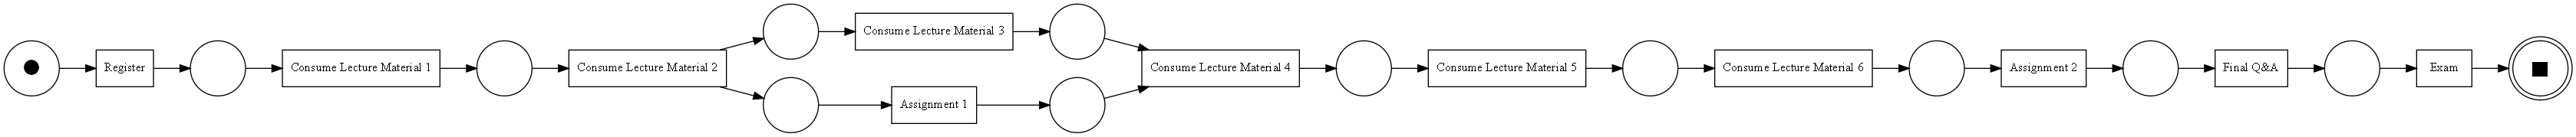

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

{'perc_fit_traces': 30.8,
 'average_trace_fitness': 0.7458253767066213,
 'log_fitness': 0.7773105405749382,
 'percentage_of_fitting_traces': 30.8}

In [29]:
#petrinet for 30% with 0 noise
net, im, fm = pt_converter.apply(tree_30)
pm4py.view_petri_net(net, im, fm, format='png')

# Computing trace fitness of base with 0 noise
token_replay_result = token_based_replay.apply(event_log, net, im, fm)
#display(token_replay_result[0])
fitness = replay_fitness_evaluator.apply(event_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness)

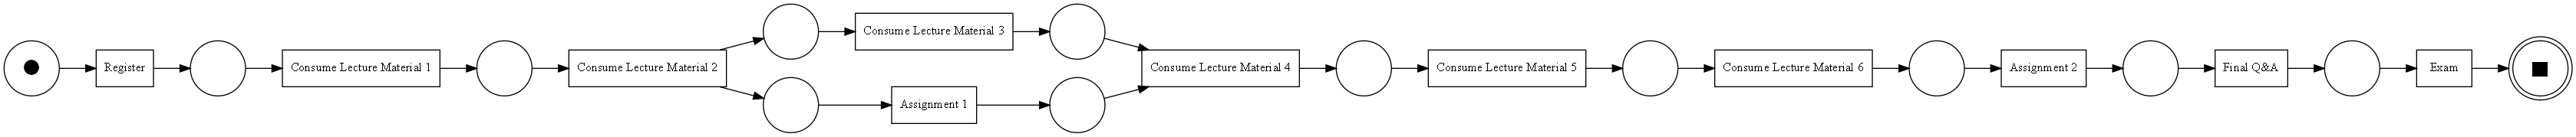

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

{'perc_fit_traces': 30.8,
 'average_trace_fitness': 0.7458253767066213,
 'log_fitness': 0.7773105405749382,
 'percentage_of_fitting_traces': 30.8}

In [30]:
#petrinet for 30% with 0.2 noise
net, im, fm = pt_converter.apply(log_varaint03_0_2)
pm4py.view_petri_net(net, im, fm, format='png')

# Computing trace fitness of base with 0 noise
token_replay_result = token_based_replay.apply(event_log, net, im, fm)
#display(token_replay_result[0])
fitness = replay_fitness_evaluator.apply(event_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness)

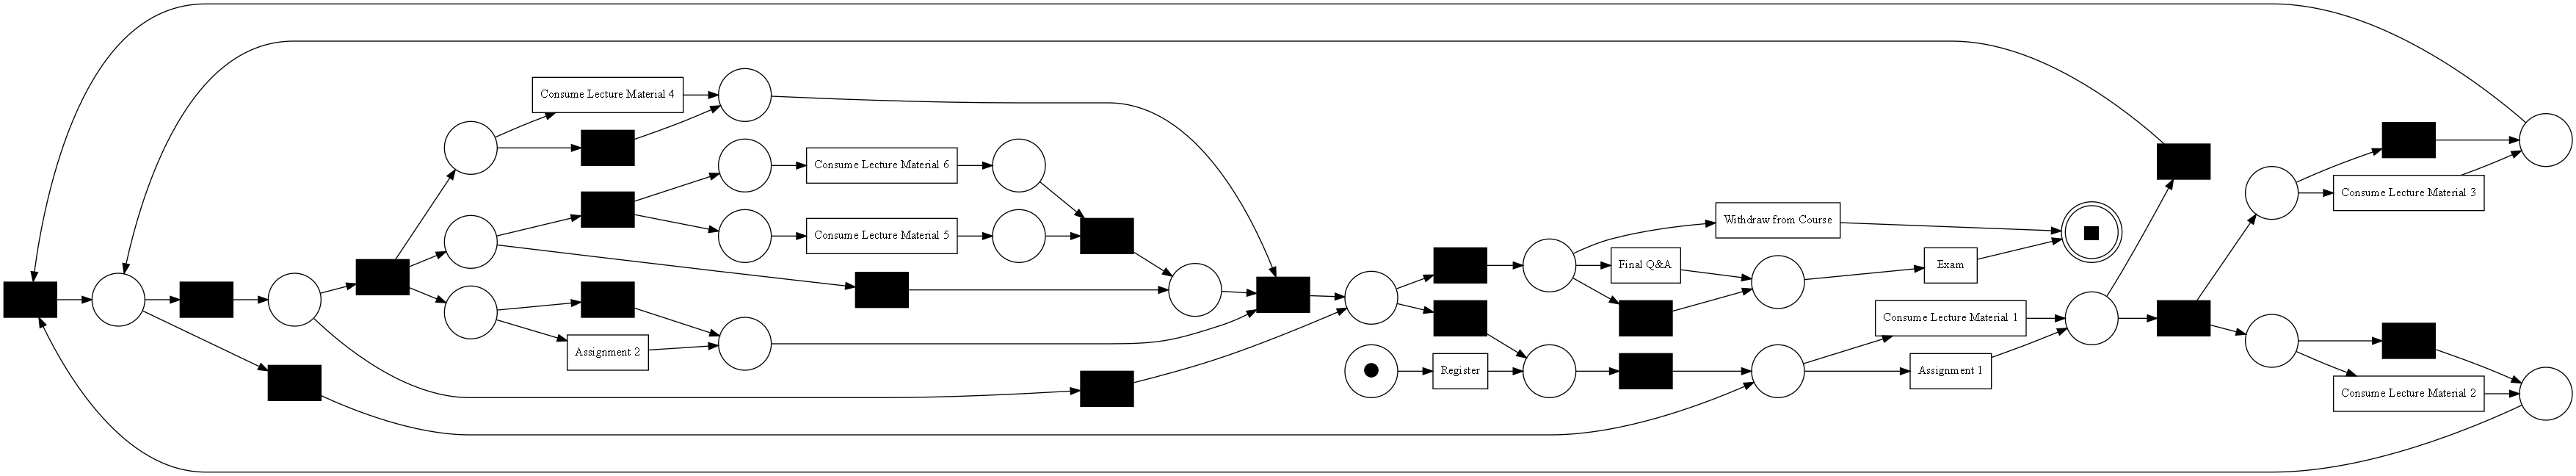

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

{'perc_fit_traces': 83.2,
 'average_trace_fitness': 0.9844039963076061,
 'log_fitness': 0.9873518211174925,
 'percentage_of_fitting_traces': 83.2}

In [31]:
#petrinet for 50% with 0 noise
net, im, fm = pt_converter.apply(tree_50)
pm4py.view_petri_net(net, im, fm, format='png')

# Computing trace fitness of base with 0 noise
token_replay_result = token_based_replay.apply(event_log, net, im, fm)
#display(token_replay_result[0])
fitness = replay_fitness_evaluator.apply(event_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness)

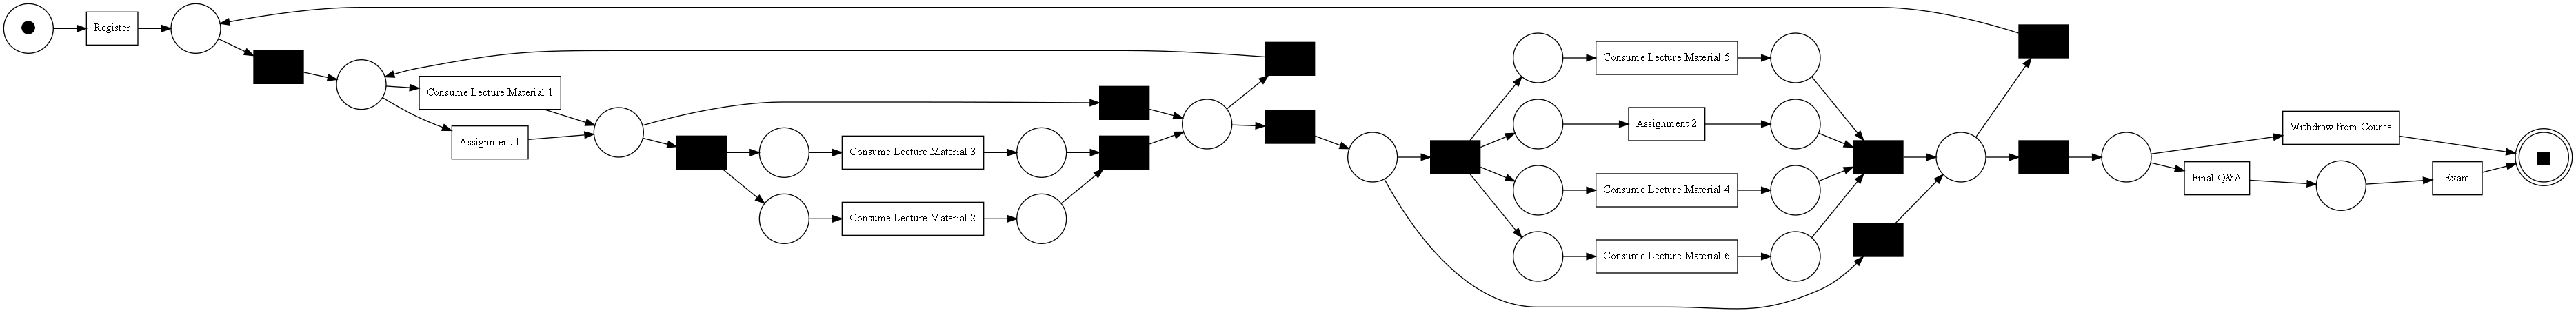

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

{'perc_fit_traces': 57.5,
 'average_trace_fitness': 0.9393058398699954,
 'log_fitness': 0.9532982215599588,
 'percentage_of_fitting_traces': 57.5}

In [32]:
#petrinet for 50% with 0.2 noise
net, im, fm = pt_converter.apply(log_varaint05_0_2)
pm4py.view_petri_net(net, im, fm, format='png')

# Computing trace fitness of base with 0 noise
token_replay_result = token_based_replay.apply(event_log, net, im, fm)
#display(token_replay_result[0])
fitness = replay_fitness_evaluator.apply(event_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness)

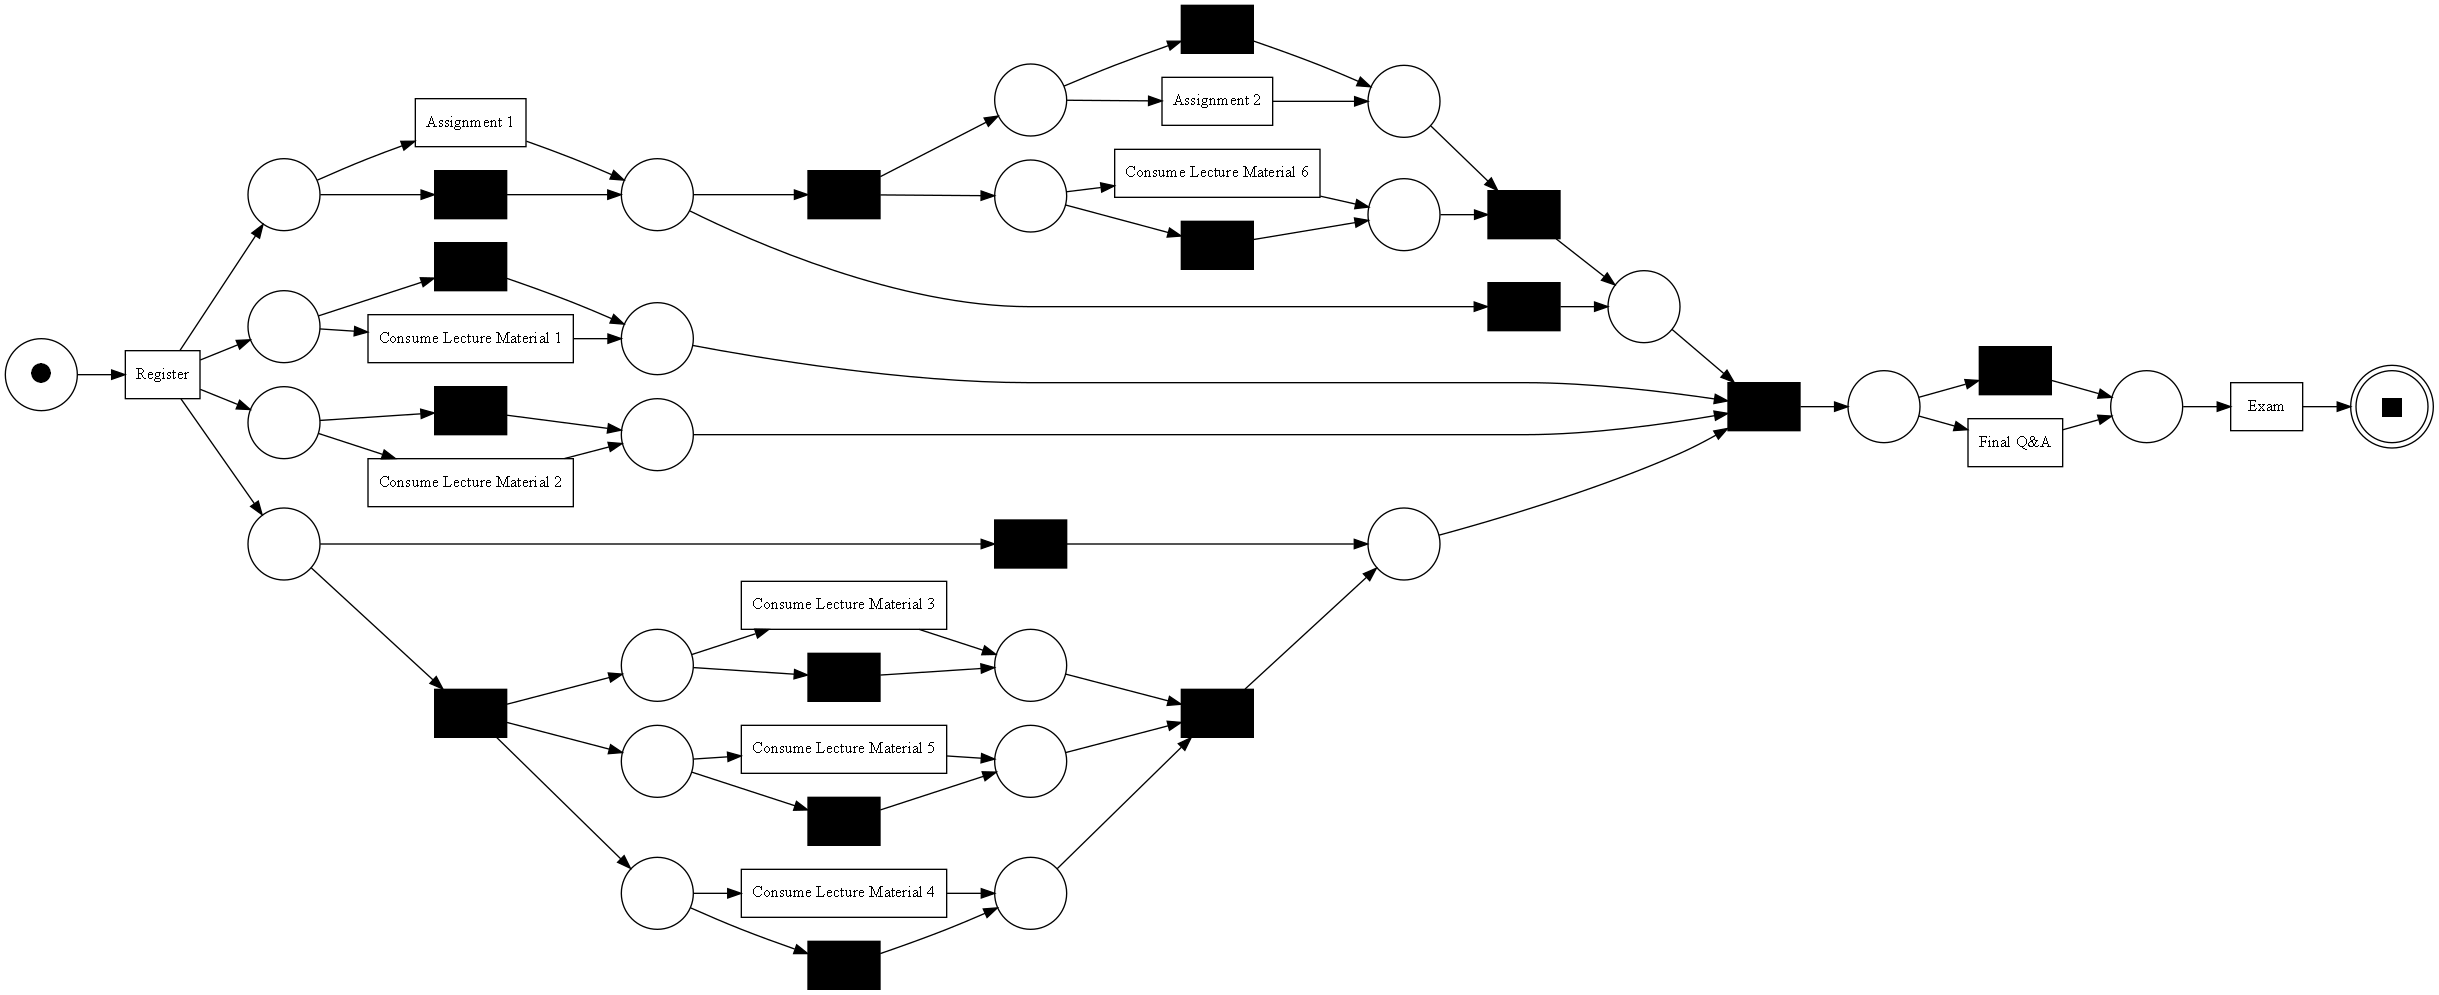

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

{'perc_fit_traces': 89.4,
 'average_trace_fitness': 0.964450607317519,
 'log_fitness': 0.9828567012927432,
 'percentage_of_fitting_traces': 89.4}

In [33]:
#petrinet for log exam with 0 noise
net, im, fm = pt_converter.apply(tree_exam)
pm4py.view_petri_net(net, im, fm, format='png')

# Computing trace fitness of base with 0 noise
token_replay_result = token_based_replay.apply(event_log, net, im, fm)
#display(token_replay_result[0])
fitness = replay_fitness_evaluator.apply(event_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness)

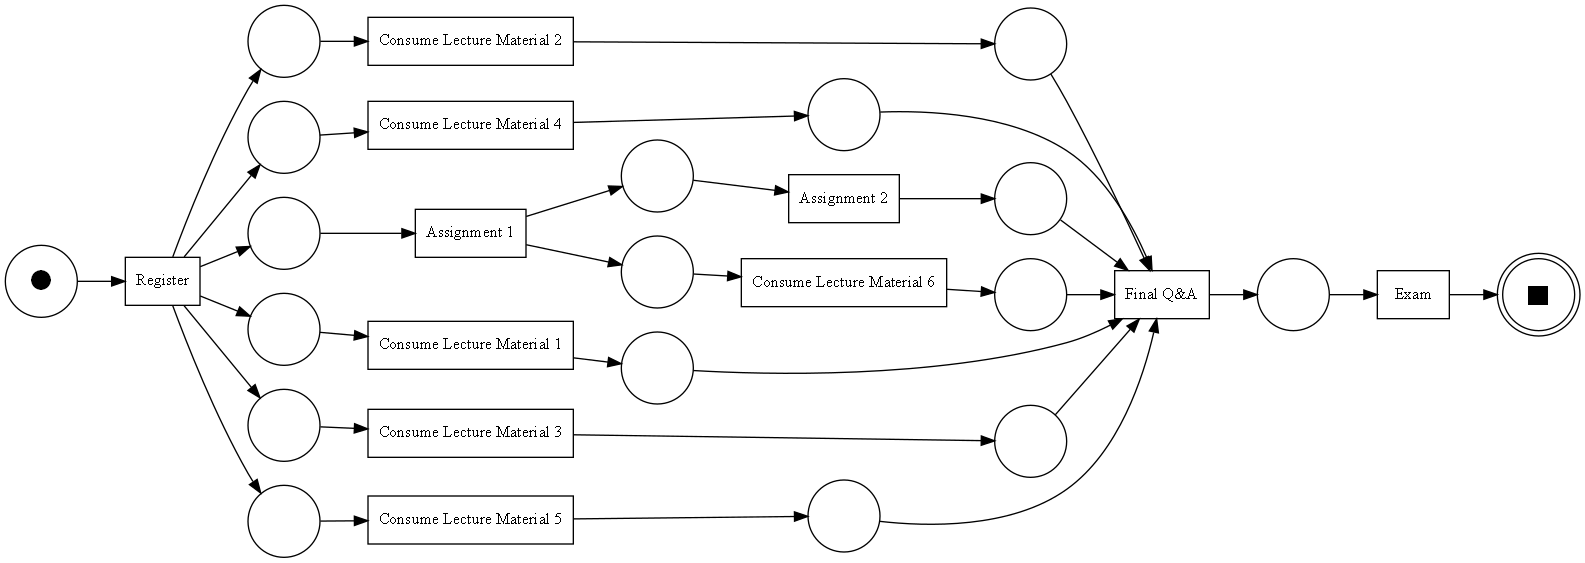

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

{'perc_fit_traces': 69.3,
 'average_trace_fitness': 0.9065389347376496,
 'log_fitness': 0.9338470442519115,
 'percentage_of_fitting_traces': 69.3}

In [34]:
#petrinet for log exam with 0.2 noise 
net, im, fm = pt_converter.apply(log_exam_0_2)
pm4py.view_petri_net(net, im, fm, format='png')

# Computing trace fitness of base with 0 noise
token_replay_result = token_based_replay.apply(event_log, net, im, fm)
#display(token_replay_result[0])
fitness = replay_fitness_evaluator.apply(event_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness)

### Paths of Excellence

**g)** As lectures are in a constant urge to improve their courses in a way that participants learn as much as possible ;), you are facing the research question to identify *paths of excellence*.
In particular, you should identify how the studying behavior differs between excellent students (**final exam score greater than or equal to 85**) and non-excellent students (**final exam score less than 85**).
Try to answer this research questions using techniques from the preceding Process Mining questions. 

*Hint: There is no single unique solution (e.g., in terms of parameter choice); therefore, it suffices if your "design choices" are reasonble.* \
*Hint: The final exam score is point score that is associated with the "Exam" event.*


In [ ]:
# your code

*Your markdown for your discussion.*

## Performance and Frequency Decoration

**h)** While the discovery of a process model is the most prototypical step in a process mining analysis, its enrichment by frequency and performance statistics is a very common step too. To this end, enrich the Petri net that you discovered for log_exam using Inductive Miner with noise threshold 0.2 by frequency and performance information. Plot two Petri nets decorated with frequency and performance information, respectively.

Describe your results. Can you observe any problems (in particular with respect to the initial process description)?

 Frequency Petrinet:


replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

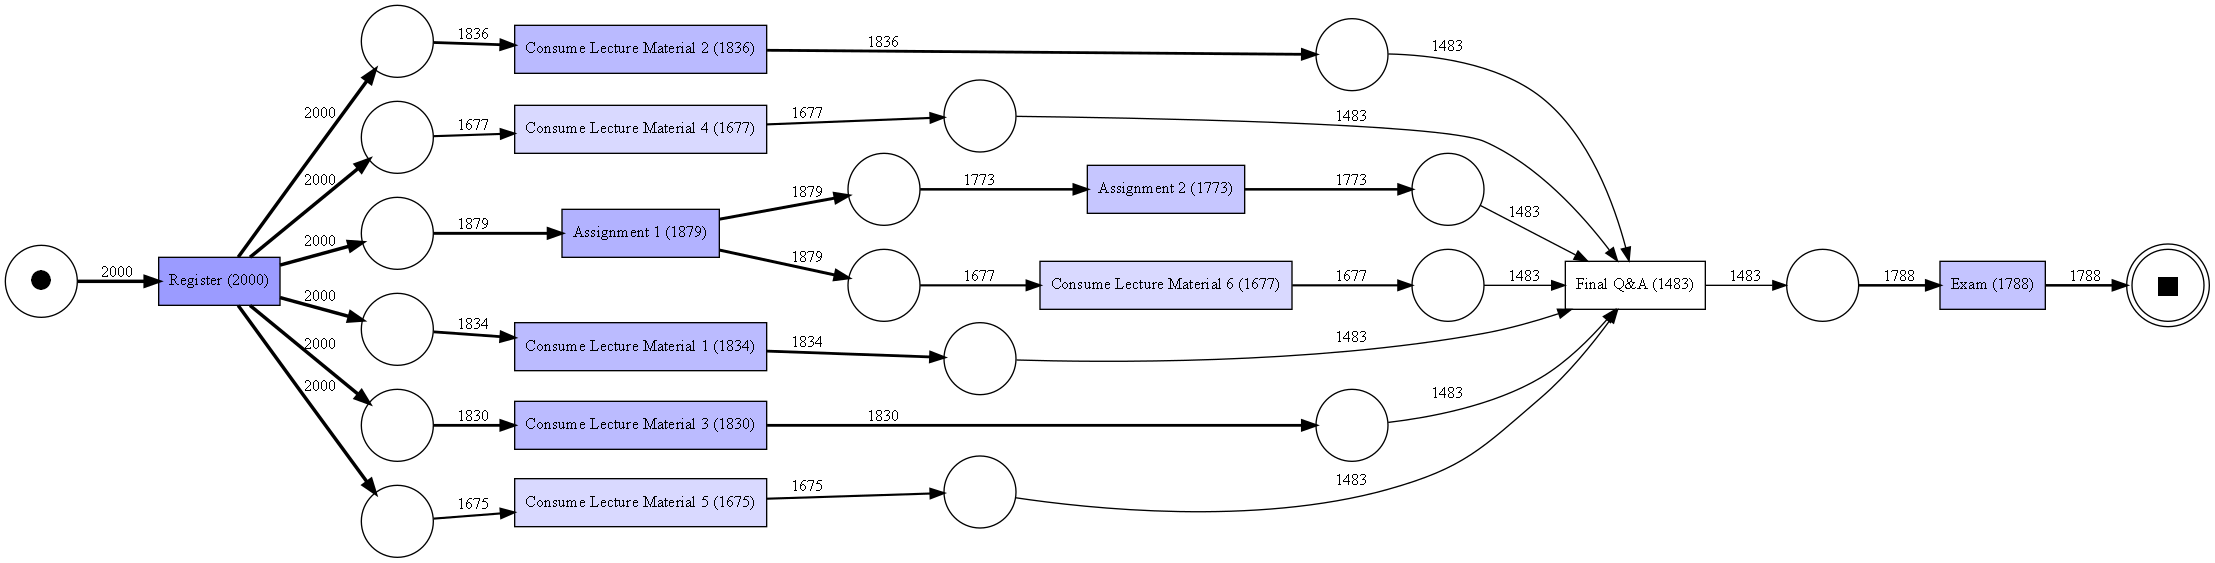

 performance Petrinet:


replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

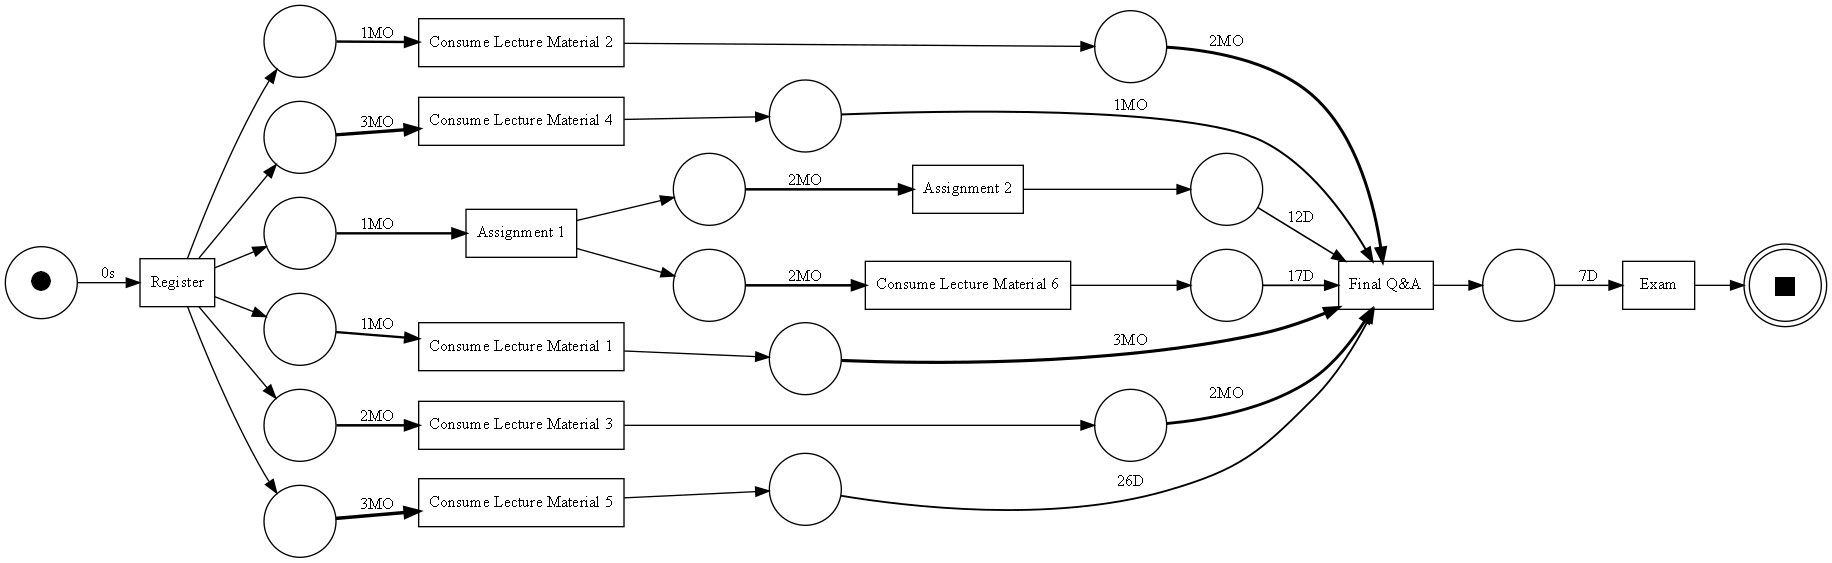

In [44]:
# your code
#petrinet for log exam with 0.2 noise 
print(f'\033[1m Frequency Petrinet:\033[0m')
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=event_log)
pn_visualizer.view(gviz)

print(f'\033[1m performance Petrinet:\033[0m')
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm, parameters=parameters, variant=pn_visualizer.Variants.PERFORMANCE, log=event_log)
pn_visualizer.view(gviz)

*Your markdown for your discussion.*

## Process Mining Meets Advanced Visualization

### Studying Activity Heatmap

**a)** In this task, we are going to use advanced visualization techniques to create an overview over the course acitivities over time (**log.csv**).
In particular, you shall create a heatmap that shows how often activities occur in a particular week. 
Your heatmap should adhere to the following specification:
- y-axis: Shows the activity labels
- x-axis: Time in terms of course weeks. See the following example snippet:
<div>
<img src="templates/PMAV_HeatmapXAxisSnippet.png" width="100"/>
</div>
- data: The bucket counts should be derived from **log.csv**

Using this configuration, the bucket 2021-11-24 till 2021-12-01 with y-axis label "Exam" and value v would be read as:
In the week between 2021-11-24 and 2021-12-01 v exams took place.

Describe your result. Which patterns do you observe?

In [ ]:
# your code


*Your markdown for your discussion.*

**b)** Can you relate the patterns that you observe in the heatmap to the process models that you discovered in question **Q5 - f)**?

*Hint: In contrast to the other questions, this question is deliberately less explicit. You may approach it having the following question in mind: \
Is there a pattern in the heatmap that explains why a certain process model shows a certain behavior/control flow?*

*Your markdown for your discussion.*

### Process Flow

**c)** Assume that another process analyst also had access to the event log. 
Given the data, he created the following novel entities:
- 'Block 1 Complete': The participant downloaded the entire material of the first lecture block (materials 1, 2, and 3). (Not considering when he downloaded it)
- 'Block 1 Incomplete': The participant did not download the entire material of the first lecture block
- 'Block 2 Complete': See 'Block 1 Complete'
- 'Block 2 Incomplete': See 'Block 1 Incomplete'
- 'Ass 1 Excellent': Participant scored at least 85 points in the first part of the assignment
- 'Ass 1 Not Excellent': Participant scored less than 85 points in the part of the assignment
- 'Ass 2 Not Excellent', 'Ass 2 Excellent', 'Exam Not Excellent', 'Exam Excellent': Similar to 'Ass 1 Excellent' and 'Ass 1 Not Excellent'
- 'Withdraw': Participant dropped the course

Based on the entities he derived a set of flow, for example, the flow between 'Block 1 Complete' and 'Ass 1 Excellent' describes how often a partipant who consumed the first lecture block scored excellent in the first part of the assignment.

The next cell loads the entities and flows for you. The flows are stored as a dictionary following the pattern:

    (source, target): flow_value
    
where source and target are indices into the entities list.

Create a **Sankey diagram** that visulizes these flows. Please use `plotly.graph_object.Sankey` to create the diagram.

Briefly **describe** your results.
Moreover, **discuss** this visualization considering your knowlege from the Process Mining task.

*Hint: Having a look at the Sankey diagram will make the analyst's idea behind the entities much clearer.*

In [ ]:
with open('./dataset/sankeyEntities.pkl', 'rb') as f:
    entities = pickle.load(f)
with open('./dataset/sankeyFlows.pkl', 'rb') as f:
    flows = pickle.load(f)

In [ ]:
# your code

*Your markdown for your discussion.*

# Question 6 - Big Data (15 points) 

### Problem Description
You are working at a finance company that makes loans to individuals and businesses. As a process analyst in *business intelligence team*, you are expected to deliver data-driven insights to improve business processes of the company. Recently, your boss asked you to discover a comprehensive process model of 10 international branches using your big data skills. Your colleague already tried it using commercial on-premise tools, but, due to the immense size of the data, he didn't manage to even load the data to the tool. You are planning to 1) load the datasets from 10 different branches to Hadoop Distributed File System (HDFS), 2) preprocess them using HDFS, and 3) use MapReduce programming model to discover a comprehensive process model. 

### Preparation
The preparation of this problem consists of two steps:

**Preparation step 1**: Replace the filepath to your own filepath to produce the **LoanApplication.csv**.  

In [35]:
import pandas as pd
#your filepath
filepath = "./dataset/LoanApplication.csv"
original_log = pd.read_csv(filepath,sep=",")
original_log.head()

,eventID,CaseID,Activity,Timestamp,LoanGoal,ApplicationType,RequestedAmount,Action,FirstWithdrawalAmount,Accepted,NumberOfTerms,OfferID,org:resource,MonthlyCost,EventOrigin,EventID,Selected,CreditScore,OfferedAmount,Duration
0,661035,Application_1000086665,A_Create Application,18601566,"Other, see explanation",New credit,5000.0,Created,NaN,NaN,NaN,NaN,User_1,NaN,Application,Application_1000086665,NaN,NaN,NaN,0
1,661036,Application_1000086665,A_Submitted,18601566,"Other, see explanation",New credit,5000.0,statechange,NaN,NaN,NaN,NaN,User_1,NaN,Application,ApplState_161925113,NaN,NaN,NaN,0
2,661040,Application_1000086665,A_Concept,18601632,"Other, see explanation",New credit,5000.0,statechange,NaN,NaN,NaN,NaN,User_1,NaN,Application,ApplState_385184570,NaN,NaN,NaN,0
3,661041,Application_1000086665,W_Complete application,18679694,"Other, see explanation",New credit,5000.0,Obtained,NaN,NaN,NaN,NaN,User_14,NaN,Workflow,Workitem_518019192,NaN,NaN,NaN,0
4,661043,Application_1000086665,A_Accepted,18767152,"Other, see explanation",New credit,5000.0,statechange,NaN,NaN,NaN,NaN,User_5,NaN,Application,ApplState_856156982,NaN,NaN,NaN,0


**Preparation step 2**: In this question, we generate 10 event logs based on the ``original_log``. For randomization, you need to use the sum of the group's matriculation numbers (e.g., a group with 3 students having "100000", "100001", and "100002" as their matriculation numbers will use "300003" for the randomization).

In [39]:
# Below are GIVEN utility functions (do not modify):
import random
import os
def _ramdomize(x):
    random_val = random.randint(5,10)
    return x+random_val

def _randomize_log(log,matriculation_num):
    """Randomize case attributes based on the matriculation number

    Keyword arguments:
    log -- event log
    matriculation_num - sum of matriculation numbers
    """
    attribute_cols = ["Duration"]
    random.seed(matriculation_num)
    for attr in attribute_cols:
        log[attr] = log[attr].apply(_ramdomize)
    return log

def _extract_log(log,iter_num):
    """Extract n-th log to ./generated_logs/

    Keyword arguments:
    log -- event log
    iter_num -- n-th iteration
    """
    log.to_csv("./generated_logs/generated_log-{}.tsv".format(iter_num),header=False,index=False, sep="\t",line_terminator="")

def generate_log(original_log,num_replication,mat_num):
    """Generate logs (randomized by the matriculation number and extracted to ./generated_logs/) 

    Keyword arguments:
    log -- event log
    num_replication -- number of generated logs
    mat_num -- sum of matriculation numbers
    """
    case_col="CaseID"
    timestamp_col = "Timestamp"
    dir_path = "./generated_logs"
    try:
        os.mkdir(dir_path)
    except OSError:
        print ("Directory already exists: %s" % dir_path)
    else:
        print ("Successfully created the directory %s " % dir_path)
    
    for i in range(num_replication):
        print("starts {}".format(i))
        generated_log = original_log.copy(deep=True)
        generated_log[case_col] = str(i) + generated_log[case_col]
        generated_log[timestamp_col] = generated_log[timestamp_col].apply(str).str.zfill(10)
        randomized_log = _randomize_log(generated_log,mat_num)
        _extract_log(randomized_log,i)
        print ("Successfully created %i th log at %s "% (i,dir_path))

Replace the SUM_MAT_NUM to yours to generate logs.

In [45]:
# your code
SUM_MAT_NUM = sum([414354, 404073])
NUM_REPITITION=10
generate_log(original_log,NUM_REPITITION,SUM_MAT_NUM)

Directory already exists: ./generated_logs
starts 0
Successfully created 0 th log at ./generated_logs 
starts 1
Successfully created 1 th log at ./generated_logs 
starts 2
Successfully created 2 th log at ./generated_logs 
starts 3
Successfully created 3 th log at ./generated_logs 
starts 4
Successfully created 4 th log at ./generated_logs 
starts 5
Successfully created 5 th log at ./generated_logs 
starts 6
Successfully created 6 th log at ./generated_logs 
starts 7
Successfully created 7 th log at ./generated_logs 
starts 8
Successfully created 8 th log at ./generated_logs 
starts 9
Successfully created 9 th log at ./generated_logs 


### 6.1. Hadoop Distributed File System (HDFS)

Now, it's time to work with the Hadoop Distributed File System (HDFS). The goal of this task is to merge 10 event logs at your disk using HDFS. Follow the instructions below and show your results in each step (screenshots of the command line). We use "letter identifier" for this task (The letter identifier is the string consisting of the first letters of the group memebers' first names, e.g., for the group with "Antonio Rüdiger", "Bernd Leno", "Christian Günter", the indentifier is "ABC").

    1) Import the event logs to your Docker engine (at /usr/local/hadoop/(identifier)-generated-logs/).
    2) Upload the event logs to the running HDFS (at /input/(identifier)-generated-logs/). 
    3) Merge all the files and copy the result back to HDFS (at /input/(identifier)-final-log-10.tsv).
    4) Merge 6 files (you can randomly select) and copy the result back to HDFS (at /input/(identifier)-final-log-6.tsv).
    5) Merge 2 files (you can randomly select) and copy the result back to HDFS (at /input/(identifier)-final-log-2.tsv).
    6) Print out the completely-merged event log from 3), i.e., "(identifier)-final-log-10.tsv", in the command line (the screenshot may contain 10 rows).

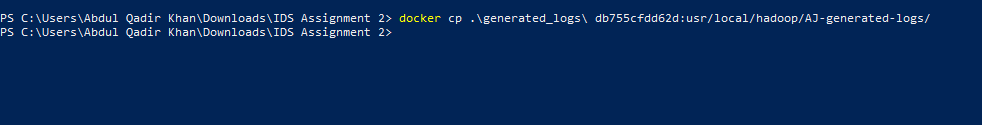

In [1]:
#your code
from IPython.display import Image
Image(filename='./dataset/1.png')

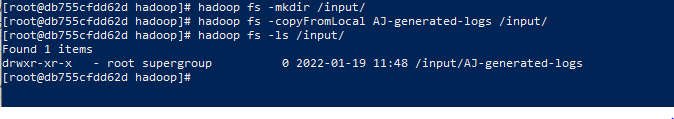

In [5]:
Image(filename='./dataset/2.png')

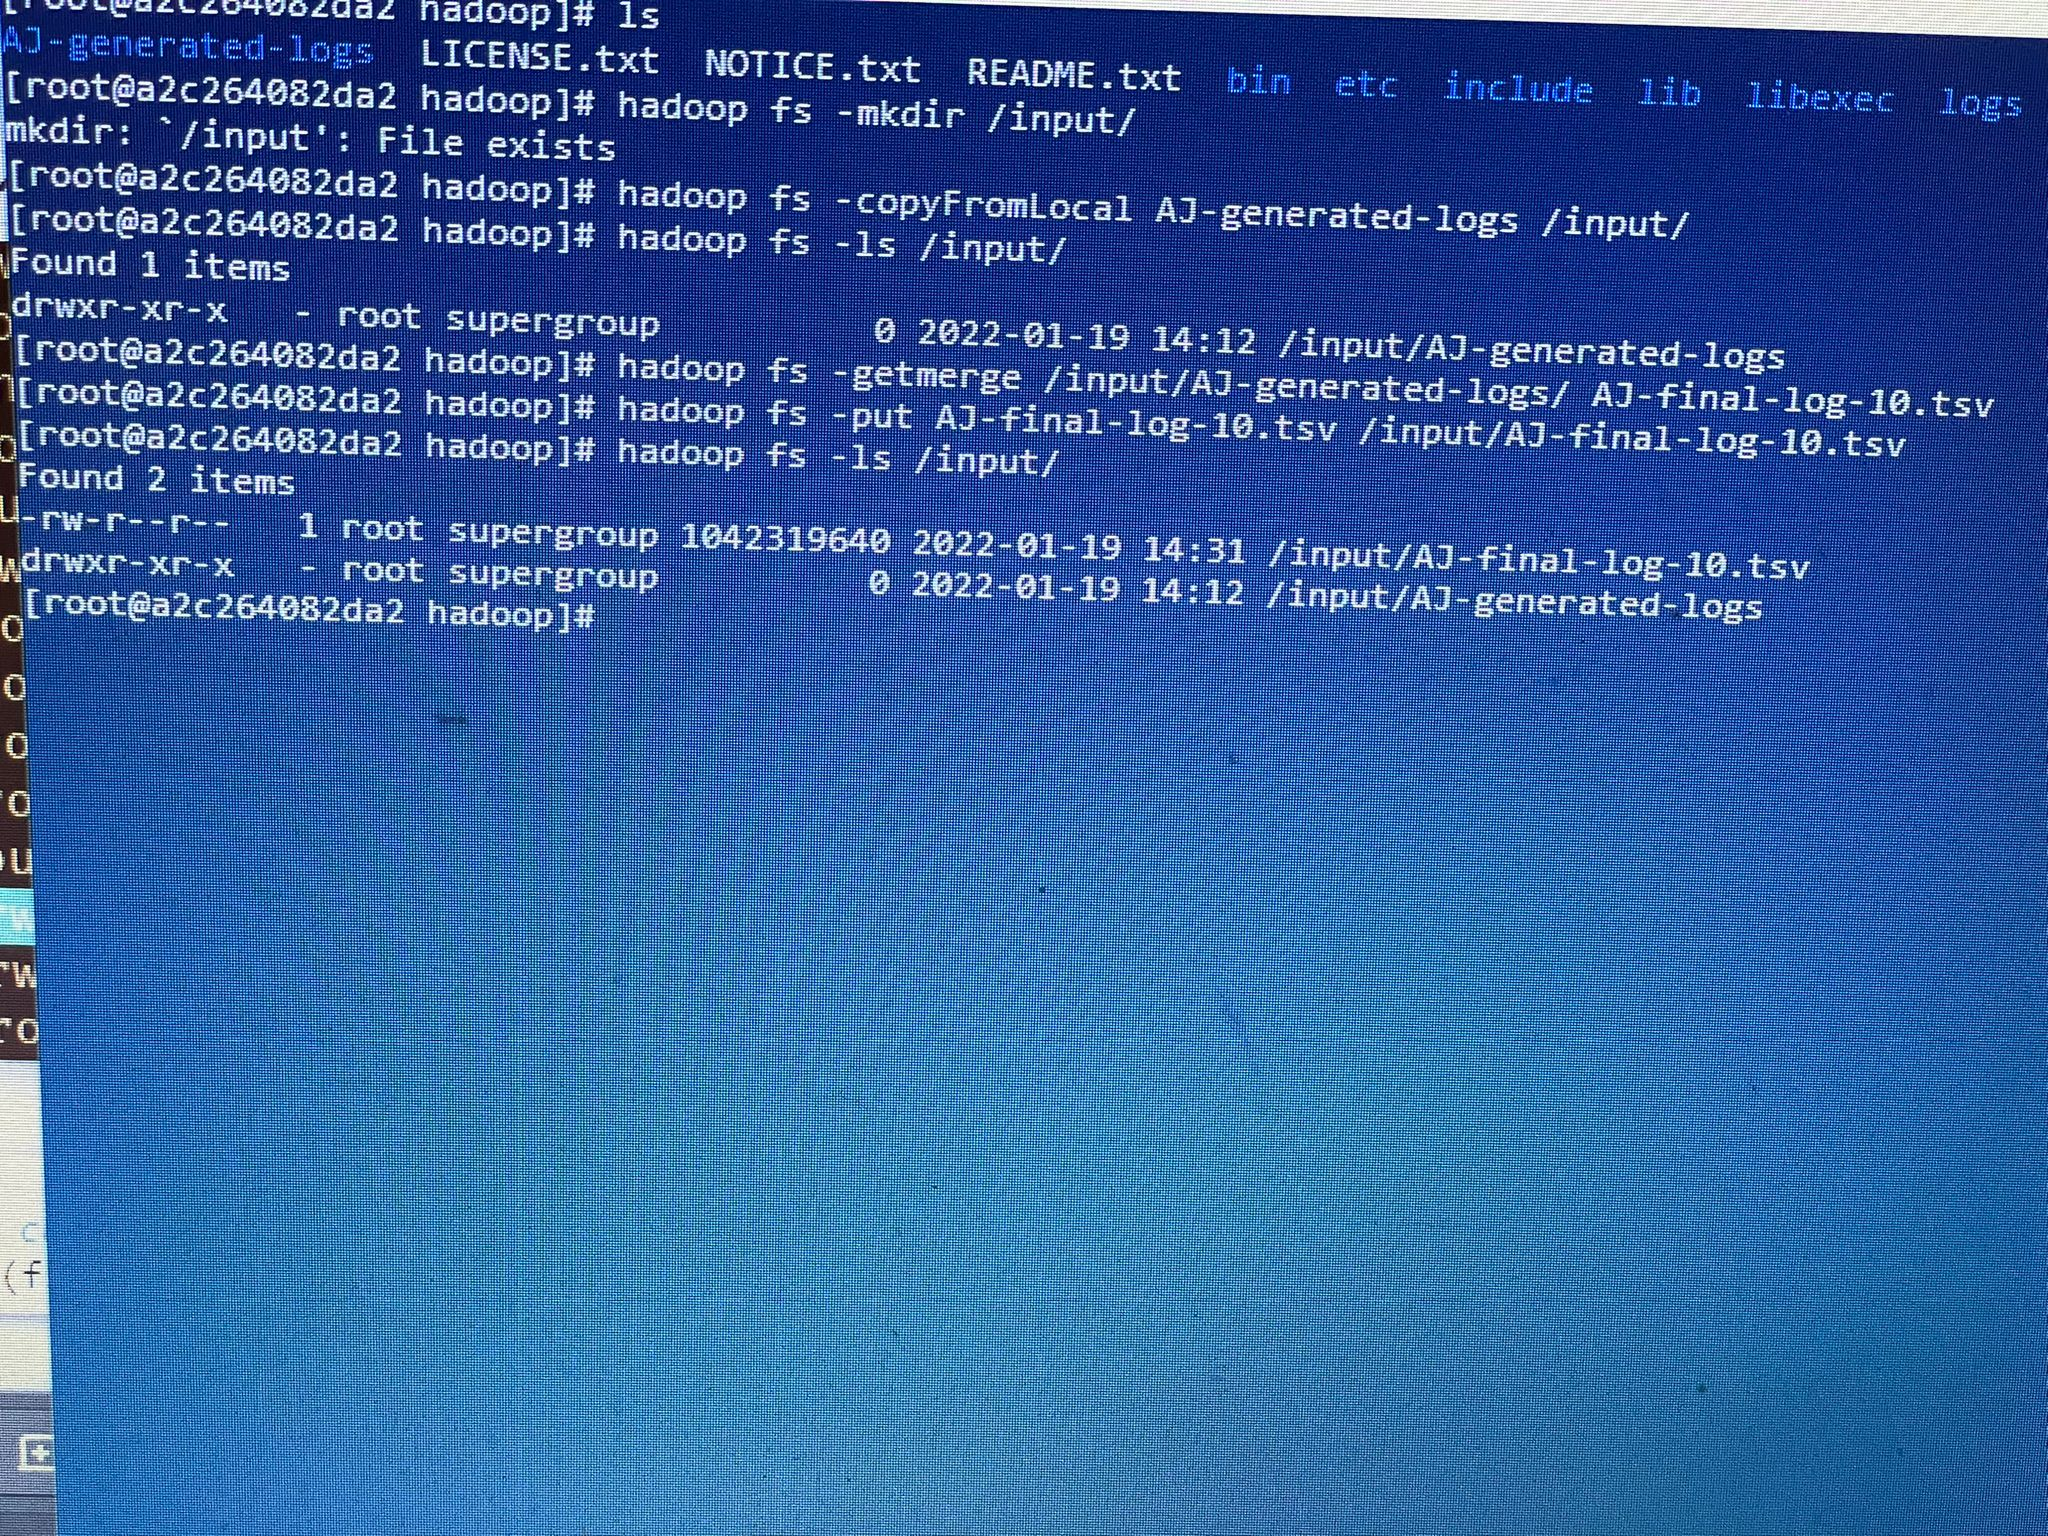

In [3]:
#your code
Image(filename='./dataset/3.jpeg')

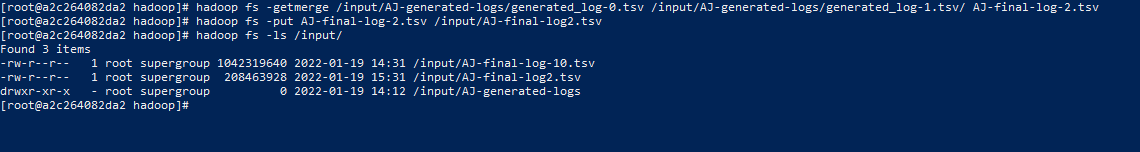

In [4]:
#your code
Image(filename='./dataset/4.png')

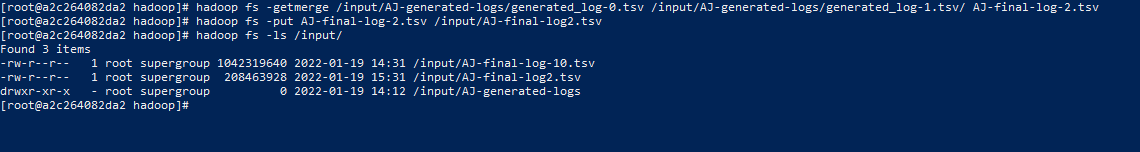

In [6]:
Image(filename='./dataset/5.png')

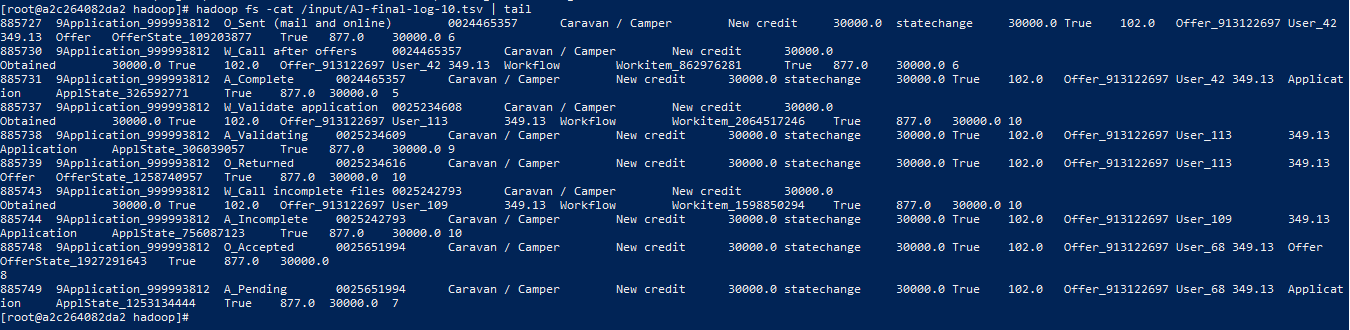

In [7]:
#your code
Image(filename='./dataset/6.png')

### 6.2. Process Discovery

Discover a process model from the completely merged event log using MapReduce algorithms. Explain how you discover the process model with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce computation (as text file)
    4) Jupyter notebook script that visualize (1) a directly-follows graph and (2) a Petri net  based on the computed directly-follows relations.

<font color='red'>Important!</font> Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce computations for this task, you will get 0 points.The deliverables of 1), 2), and 3) should be submitted as outputs. 

In [ ]:
# your code

### 6.3. Performance Analysis

a) Compute the total service time for each case based on MapReduce algorithms using the completely-merged event log (i.e., (identifier)-final-log-10.tsv) and visualize 100 cases that show the longest total service time using any chart.
    
The deliverables of 1), 2), 3) and 4) should be submitted as outputs:
```
1) Mapper function (as python file(s))
2) Reducer function (as python file(s))
3) Hadoop commands for MapReduce calculation (as text file)
4) Result: total service times for cases (as text file)
```

b) Compare the (approximate) computation time of the service time calculation between 1. the completely-merged event log (i.e., (identifier)-final-log-10.tsv), 2. 6-merged event log (i.e., (identifier)-final-log-6.tsv), and 3. 2-merged event log (i.e., (identifier)-final-log-2.tsv). Interpret the difference (e.g., the computation time scales linearly with the increasing number of events).

In [ ]:
# your code